<a href="https://colab.research.google.com/github/aaron-ruhl/Trade-Ahead/blob/main/USL_Project_LearnerNotebook_FullCode_AaronRuhl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://colab.research.google.com/drive/1HlTRDrlp_9LWJPwJSSQFw8nqbqURv8rB?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised Learning: Trade&Ahead

**Marks: 60**

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# to create and use data frames
import numpy as np
import pandas as pd

# to create data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to perform Kmeans++ clustering, and compute silhouette score
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# to compute distances
from scipy.spatial.distance import pdist, cdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

In [ ]:
# to set pandas display options
pd.options.display.float_format = '{:.2f}'.format # to remove scientific notation
pd.options.display.max_rows = None
pd.options.display.max_columns = None # to remove max columns and max rows

# to give me an option for printing out data frames in an easy to read format
from tabulate import tabulate

# to activate all of the default seaborn settings
sns.set_theme()

# to set the default figure size
plt.rcParams["figure.figsize"] = (15, 6)

In [ ]:
#Importing the dataset
from google.colab import files
import io

try: # will "try" to rerun without re-downloading if the dataset is attached to this notebook already.
    uploaded
except NameError: # if the "try" above throws the exception "NameError", load in a new copy of "uploaded" by selecting it again from local files.
    uploaded = files.upload()
df=pd.read_csv(io.BytesIO(uploaded['stock_data.csv'])) # to finally build the data frame "df"

Saving stock_data.csv to stock_data.csv


## Data Overview

- Observations
- Sanity checks

In [ ]:
df.shape

(340, 15)

**Looks like there could be up to 340 different companies and 15 columns.**

In [ ]:
df.sample(15,random_state=1) #using the sample method to give me a good mix of data

Ticker Symbol                     Security             GICS Sector  \
102           DVN           Devon Energy Corp.                  Energy   
125            FB                     Facebook  Information Technology   
11            AIV  Apartment Investment & Mgmt             Real Estate   
248            PG             Procter & Gamble        Consumer Staples   
238           OXY         Occidental Petroleum                  Energy   
336           YUM              Yum! Brands Inc  Consumer Discretionary   
112           EQT              EQT Corporation                  Energy   
147           HAL              Halliburton Co.                  Energy   
89            DFS  Discover Financial Services              Financials   
173           IVZ                 Invesco Ltd.              Financials   
117           ETR                Entergy Corp.               Utilities   
230           NSC       Norfolk Southern Corp.             Industrials   
123             F                   Ford Motor  Consumer Discretionary   
161           HST        Host Hotels & Resorts             Real Estate   
4             ADI         Analog Devices, Inc.  Information Technology   

                      GICS Sub Industry  Current Price  Price Change  \
102  Oil & Gas Exploration & Production          32.00        -15.48   
125        Internet Software & Services         104.66         16.22   
11                                REITs          40.03          7.58   
248                   Personal Products          79.41         10.66   
238  Oil & Gas Exploration & Production          67.61          0.87   
336                         Restaurants          52.52         -8.70   
112  Oil & Gas Exploration & Production          52.13        -21.25   
147      Oil & Gas Equipment & Services          34.04         -5.10   
89                     Consumer Finance          53.62          3.65   
173    Asset Management & Custody Banks          33.48          7.07   
117                  Electric Utilities          68.36          4.91   
230                           Railroads          84.59          9.53   
123            Automobile Manufacturers          14.09          2.40   
161                               REITs          15.34         -3.22   
4                        Semiconductors          55.32         -1.83   

     Volatility  ROE  Cash Ratio  Net Cash Flow   Net Income  \
102        2.92  205          70      830000000 -14454000000   
125        1.32    8         958      592000000   3669000000   
11         1.16   15          47       21818000    248710000   
248        0.81   17         129      160383000    636056000   
238        1.59   32          64     -588000000  -7829000000   
336        1.48  142          27      159000000   1293000000   
112        2.36    2         201      523803000     85171000   
147        1.97    4         189     7786000000   -671000000   
89         1.16   20          99     2288000000   2297000000   
173        1.58   12          67      412000000    968100000   
117        1.22    2          44      -71065000   -156734000   
230        2.17   13          49      128000000   1556000000   
123        1.15   26          43     3515000000   7373000000   
161        1.59    8          47     -445000000    558000000   
4          1.70   14         272      315120000    696878000   

     Earnings Per Share  Estimated Shares Outstanding  P/E Ratio  P/B Ratio  
102              -35.55                  406582278.50      93.09       1.79  
125                1.31                 2800763359.00      79.89       5.88  
11                 1.52                  163625000.00      26.34      -1.27  
248                3.28                  491391569.00      24.07      -2.26  
238              -10.23                  765298142.70      93.09       3.35  
336                2.97                  435353535.40      17.68      -3.84  
112                0.56                  152091071.40      93.09       9.57  
147              

**Ticker Symbol is not very helpful and can be removed, and 11 numerical columns with float/int values**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

**'Cash Ratio' is not a float valued column. Besides that everything else is rather ordinary.**

In [ ]:
df.describe(include='all').T

count unique  \
Ticker Symbol                   340    340   
Security                        340    340   
GICS Sector                     340     11   
GICS Sub Industry               340    104   
Current Price                340.00    NaN   
Price Change                 340.00    NaN   
Volatility                   340.00    NaN   
ROE                          340.00    NaN   
Cash Ratio                   340.00    NaN   
Net Cash Flow                340.00    NaN   
Net Income                   340.00    NaN   
Earnings Per Share           340.00    NaN   
Estimated Shares Outstanding 340.00    NaN   
P/E Ratio                    340.00    NaN   
P/B Ratio                    340.00    NaN   

                                                             top freq  \
Ticker Symbol                                                AAL    1   
Security                                 American Airlines Group    1   
GICS Sector                                          Industrials   53   
GICS Sub Industry             Oil & Gas Exploration & Production   16   
Current Price                                                NaN  NaN   
Price Change                                                 NaN  NaN   
Volatility                                                   NaN  NaN   
ROE                                                          NaN  NaN   
Cash Ratio                                                   NaN  NaN   
Net Cash Flow                                                NaN  NaN   
Net Income                                                   NaN  NaN   
Earnings Per Share                                           NaN  NaN   
Estimated Shares Outstanding                                 NaN  NaN   
P/E Ratio                                                    NaN  NaN   
P/B Ratio                                                    NaN  NaN   

                                      mean           std             min  \
Ticker Symbol                          NaN           NaN             NaN   
Security                               NaN           NaN             NaN   
GICS Sector                            NaN           NaN             NaN   
GICS Sub Industry                      NaN           NaN             NaN   
Current Price                        80.86         98.06            4.50   
Price Change                          4.08         12.01          -47.13   
Volatility                            1.53          0.59            0.73   
ROE                                  39.60         96.55            1.00   
Cash Ratio                           70.02         90.42            0.00   
Net Cash Flow                  55537620.59 1946365312.18 -11208000000.00   
Net Income                   1494384602.94 3940150279.33 -23528000000.00   
Earnings Per Share                    2.78          6.59          -61.20   
Estimated Shares Outstanding  577028337.75  845849595.42     27672156.86   
P/E Ratio                            32.61         44.35            2.94   
P/B Ratio                            -1.72         13.97          -76.12   

                                       25%          50%           75%  \
Ticker Symbol                          NaN          NaN           NaN   
Security                               NaN          NaN           NaN   
GICS Sector                            NaN          NaN           NaN   
GICS Sub Industry                      NaN          NaN           NaN   
Current Price                        38.55        59.70         92.88   
Price Change                         -0.94         4.82         10.70   
Volatility                            1.13         1.39          1.70   
ROE                                   9.75        15.00         27.00   
Cash Ratio                           18.00        47.00         99.00   
Net Cash Flow                -193906500.00   2098000.00  169810750.00   
Net Income                    352301250.00 707336000.00 1899000000.00   
Earnings Per Share             

**Observations:**
- `Ticker Symbol` is entirely unique. Each entry corresponds to each unique entry of 'Security'. This column will be removed during analysis for simplicity.

- `GICS Sector` contains 11 different sectors, not to be confused with the 11 numerical columns mentioned above.

- `Price Change` had a vast range mostly centered above zero(average of 4.08), and a significant std of 12, which I suppose is good to see as an investor.

- Columns such as `Current Price`, `ROE`, `Cash Ratio`, `Net Cash Flow`, `Net Income`, appear heavily skewed with significant outliers.
  - For example, just picking one out of the bunch, an ROE of over 900 is ridiculously high and I bet most companies are not even close to this amount. In fact, based on the mean/median and std I can definitively say they were typically not seen much higher than 200-250; and so on for the rest of these columns.

- Overall, it appears that the data contains alot of different metrics that have wide and dynamic ranges. Any missing imputation or outlier capping should have an extremely minimal impact to reduce distortion of the data.

**Now, lets make a copy before EDA so we can preserve the original dataframe for use later**

In [ ]:
#Instantiating stockData as a copy of df and dropping 'Ticker Symbol'
stockData = df.copy()
stockData.drop('Ticker Symbol',axis=1,inplace=True)

## Exploratory Data Analysis (EDA)

### Function Definitions ---

--- dataFilterLTO (Less Than Zero)

In [ ]:
def dataFilterLT0(Data,numerical,sorter,bottomFirst,printResults):



  if sorter == None: #So that it has better default behavior
    sorter = numerical

  temp = Data[Data[numerical] <= 0].sort_values(by=sorter, ascending=bottomFirst) #defining temp as the filtered rows which contained values less than or equal to zero within 'Price Change'

  if len(temp) == 0: #this is here to give a feedback when no values are found within the selected column
    print('Filtering the rows which contained values less than or equal to 0 within the `{}` column:\n'.format(numerical))
    print('"Nothing Found" in {}'.format(numerical))

  else:
    print('Filtering the rows which contained values less than or equal to 0 within the `{}` column:\n'.format(numerical))
    if printResults == True or len(temp) <= 10:
      print('Found a total of {} rows, out of {}'.format(len(temp),len(Data)))
      print('Sorted by `{}` and "bottomFirst" is currently {}: \n'.format(sorter,bottomFirst))
      print(tabulate(temp,headers=Data.columns))
    else:
      print('Found a total of {} rows, out of {}'.format(len(temp),len(Data)))
      print('...to see detailed results, set "printResults=True"')

--- dataFilterUnique

In [ ]:
def dataFilterUnique(Data,categorical,numerical,display):

  '''
  Basically temp, created by the groupby below, has rows that correspond to each categorical grouping passed into the function.
  This was mostly different GICS Sectors for this project.
  I am printing out each row of temp in a clean looking way that is easy to read in order to look at all unique values in a more
  organized format.
  '''

  temp = pd.DataFrame(Data.groupby([categorical])[numerical].unique())

  if display == True:
    print('Displaying all of the unique values withing each GICS Sector')
    for i in range(0,10):
      print('\n',i+1,'. ',temp.index[i],':',sep='')
      print(temp.iloc[i,0])
  else:
    print('...set "display=True" in order to see all unique values')

--- drawBoxStripPlot

In [ ]:
def drawBoxStripPlot(Data,categorical,numerical,showMeans):
  '''
  Creates a subplot of boxplot/stripplot with alternative option available if someone passes categorical
  index greater than 12.
  '''
  if len(Data[categorical].unique()) > 12 or showMeans == False:

    print('making alternative graph to fit the data...')
    plt.figure(figsize=(30,12))
    sns.stripplot(data=Data,x=numerical, y=categorical)
    plt.xlabel('');
    plt.ylabel(list(Data[categorical].unique()))

  else:

    fig,[ax1,ax2] = plt.subplots(2,1,sharex=True,figsize=(15,12))

    sns.boxplot(data=Data.sort_values(by=categorical),x=numerical, y=categorical,showmeans=True,palette='magma',ax=ax1)
    ax1.set_title('{} per {}'.format(numerical,categorical))
    ax1.set_xlabel('') #decided to just make this invisible because it looks better

    sns.stripplot(data=Data.sort_values(by=categorical),x=numerical, y=categorical,palette='magma',ax=ax2)
    ax2.set_xlabel(''); #decided to just make this invisible because it looks better

--- detailedAnalysis

In [ ]:
def detailedAnalysis(Data,categorical,numerical,sorter=None,bottomFirst=True,printResults=False,display=False,graph=False,showMeans=True):

  '''
  This function has different behavior depending on what is passed into it. Mainly designed to access the functions defined above.
  Ideally, I would build a seperate Class in something like Spyder and "detailedAnalysis" would be used to expose these functions so I can access them by importing the class. Still serves as a useful
  way of easily calling them from the same place in this notebook and was a useful exercise to mess around with this function...
  '''

  if printResults ==True:

    print('\n','*'*50,
          '>>>>{}<<<<'.format(numerical),
          '*'*50,'\n')

    dataFilterLT0(Data,numerical,sorter=sorter,bottomFirst=bottomFirst,printResults=printResults) #tells dataFilerLTO that "printResults=True" and "bottomFirst=True" if that was included

  if display == True:

    print('\n','*'*50,
          '>>>>{}<<<<'.format(numerical),
          '*'*50,'\n')

    dataFilterUnique(Data.sort_values(by=numerical),categorical,numerical,display) #tells dataFilterUnique that "display=True"

  if graph == True:

    drawBoxStripPlot(Data,categorical,numerical,showMeans=showMeans) #Here I can tell it to access the graph definition above

  if graph == False and display == False and printResults == False:

    print('\n','*'*50,
          '>>>>{}<<<<'.format(numerical),
          '*'*50,'\n')

    print('\nAverage values of {} within each {}:\n{}'.format(numerical,categorical,Data.groupby([categorical])[numerical].mean()),
          sep='')

    print('\n','-'*100,'\n',
          sep='')

    dataFilterLT0(Data,numerical,sorter=sorter,bottomFirst=bottomFirst,printResults=printResults) #default behavior (display "Nothing Found" if none found, results displayed if less than 10 found); set "printResults=True" to see full results without rest shown

    print('\n','-'*100,'\n',
          sep='')

    dataFilterUnique(Data.sort_values(by=numerical),categorical,numerical,display) #default message without showing unique values, set "display=True" to see more wihtout rest shown

--- labeled Barplot

In [ ]:
# function to create labeled barplots


def labeled_barplot(Data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(Data[feature])  # length of the column
    count = Data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=Data,
        x=feature,
        palette="Paired",
        order=Data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Creating Numerical and Categorical list for EDA

In [ ]:
#Lets store the names of numerical columns in a list that can be used throughtout EDA in place of explicitly writing the names
numerical_variables = stockData.select_dtypes(include=np.number).columns
numerical_variables

Index(['Current Price', 'Price Change', 'Volatility', 'ROE', 'Cash Ratio',
       'Net Cash Flow', 'Net Income', 'Earnings Per Share',
       'Estimated Shares Outstanding', 'P/E Ratio', 'P/B Ratio'],
      dtype='object')

In [ ]:
#Lets store the categorical variables aswell
categorical_variables = stockData.select_dtypes(include='object').columns
categorical_variables, numerical_variables[1]

(Index(['Security', 'GICS Sector', 'GICS Sub Industry'], dtype='object'),
 'Price Change')

### **PART A** - **Questions**

**A1) GICS stands for 'Global Industry Classification Standard'. This classification can actually be broken into four different groupings(Search for GICS for more details). 'GICS Sector' is the smallest grouping with only 11 groups and the largest amount of diversity in each group. How many securities were in each GICS Sector?**

Industrials                    53
Financials                     49
Health Care                    40
Consumer Discretionary         40
Information Technology         33
Energy                         30
Real Estate                    27
Utilities                      24
Materials                      20
Consumer Staples               19
Telecommunications Services     5
Name: GICS Sector, dtype: int64


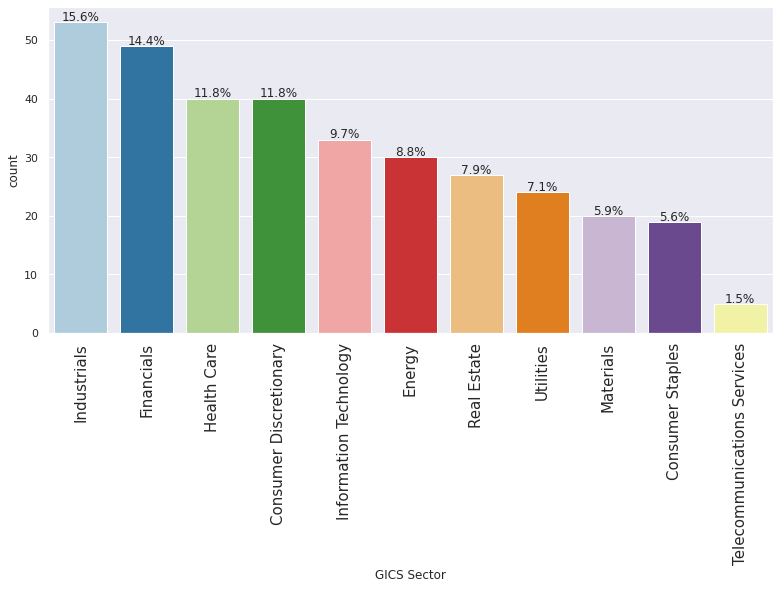

In [ ]:
#What is the breakdown of different sectors?
sectorCounts = stockData[categorical_variables[1]].value_counts()
sectorCounts

print(sectorCounts)
labeled_barplot(stockData,categorical_variables[1],perc=True)

**Observations:**
- Telecommunications Services only contained 5 observations, which is not great but this actually is not that unusual for USA Telecommunication Service companies. There is only a few really big competitors in that space.
- Overall, the top four GICS Sectors represent \~50% of the data.

**A2) 'GICS Sub Industry' is the largest grouping with the smallest amount of diversity in each group - 158 different Sub Industries compared to 11 different sectors. How many securities were in each GICS Sub Industry?**

Oil & Gas Exploration & Production                 16
REITs                                              14
Industrial Conglomerates                           14
Electric Utilities                                 12
Internet Software & Services                       12
Health Care Equipment                              11
MultiUtilities                                     11
Banks                                              10
Property & Casualty Insurance                       8
Diversified Financial Services                      7
Biotechnology                                       7
Pharmaceuticals                                     6
Packaged Foods & Meats                              6
Oil & Gas Refining & Marketing & Transportation     6
Semiconductors                                      6
Diversified Chemicals                               5
Consumer Finance                                    5
Integrated Oil & Gas                                5
Industrial Machinery        

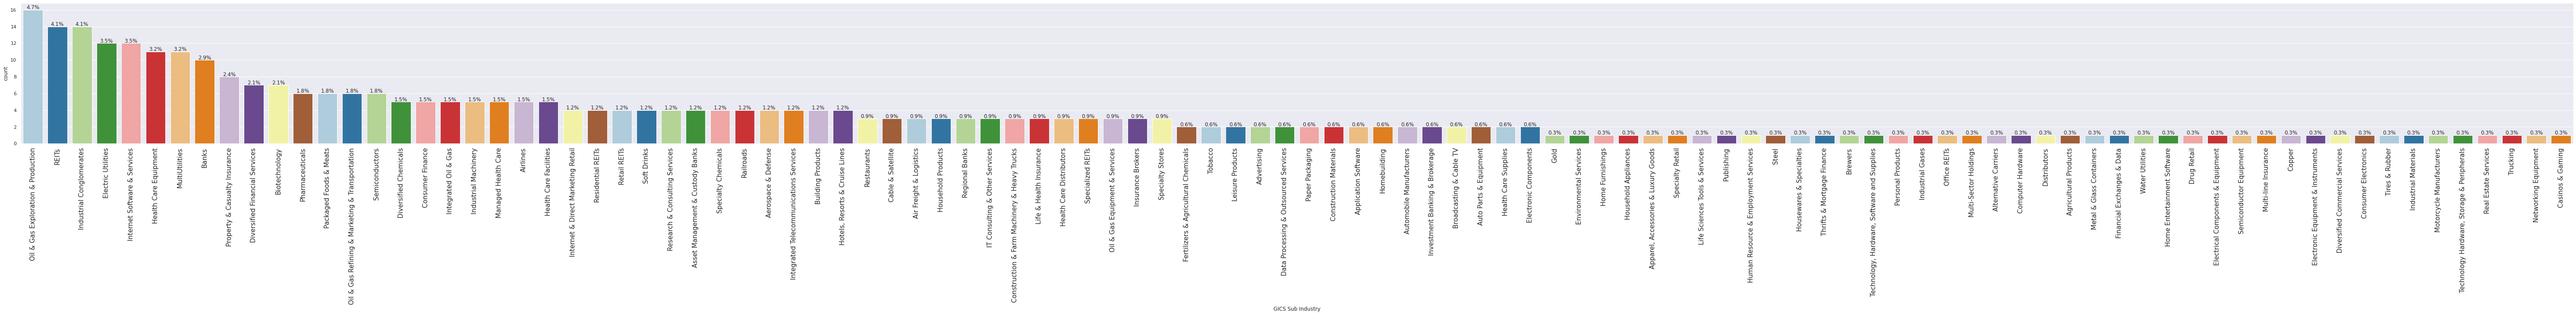

In [ ]:
#What is the breakdown of different sectors?
industryCounts = stockData[categorical_variables[2]].value_counts()
industryCounts

print(industryCounts.head(30))
labeled_barplot(stockData,categorical_variables[2],perc=True)

**Observation:**
- Top 22 Sub Industries, ending at "Health Care Facilities", represented \~50% of the data.

**A3) What does the distribution of stock prices look like?**

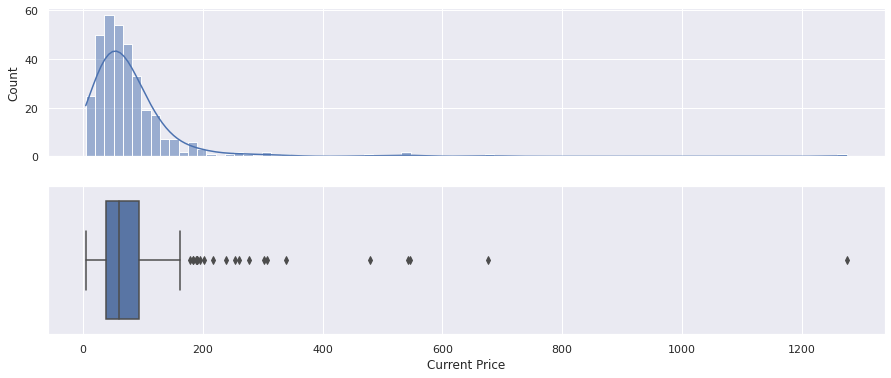

In [ ]:
fig,[ax1,ax2] = plt.subplots(2,1,sharex=True)
sns.histplot(data=stockData,x=numerical_variables[0],kde=True,ax=ax1);
sns.boxplot(data=stockData,x=numerical_variables[0],ax=ax2);

- Seems to be one major outlier, that should be fixed before scaling the data because it will just skew the distance metrics used in clustering. I will analyze this further in part B.

**Lets look at the univariate distributions of the remaining variables**

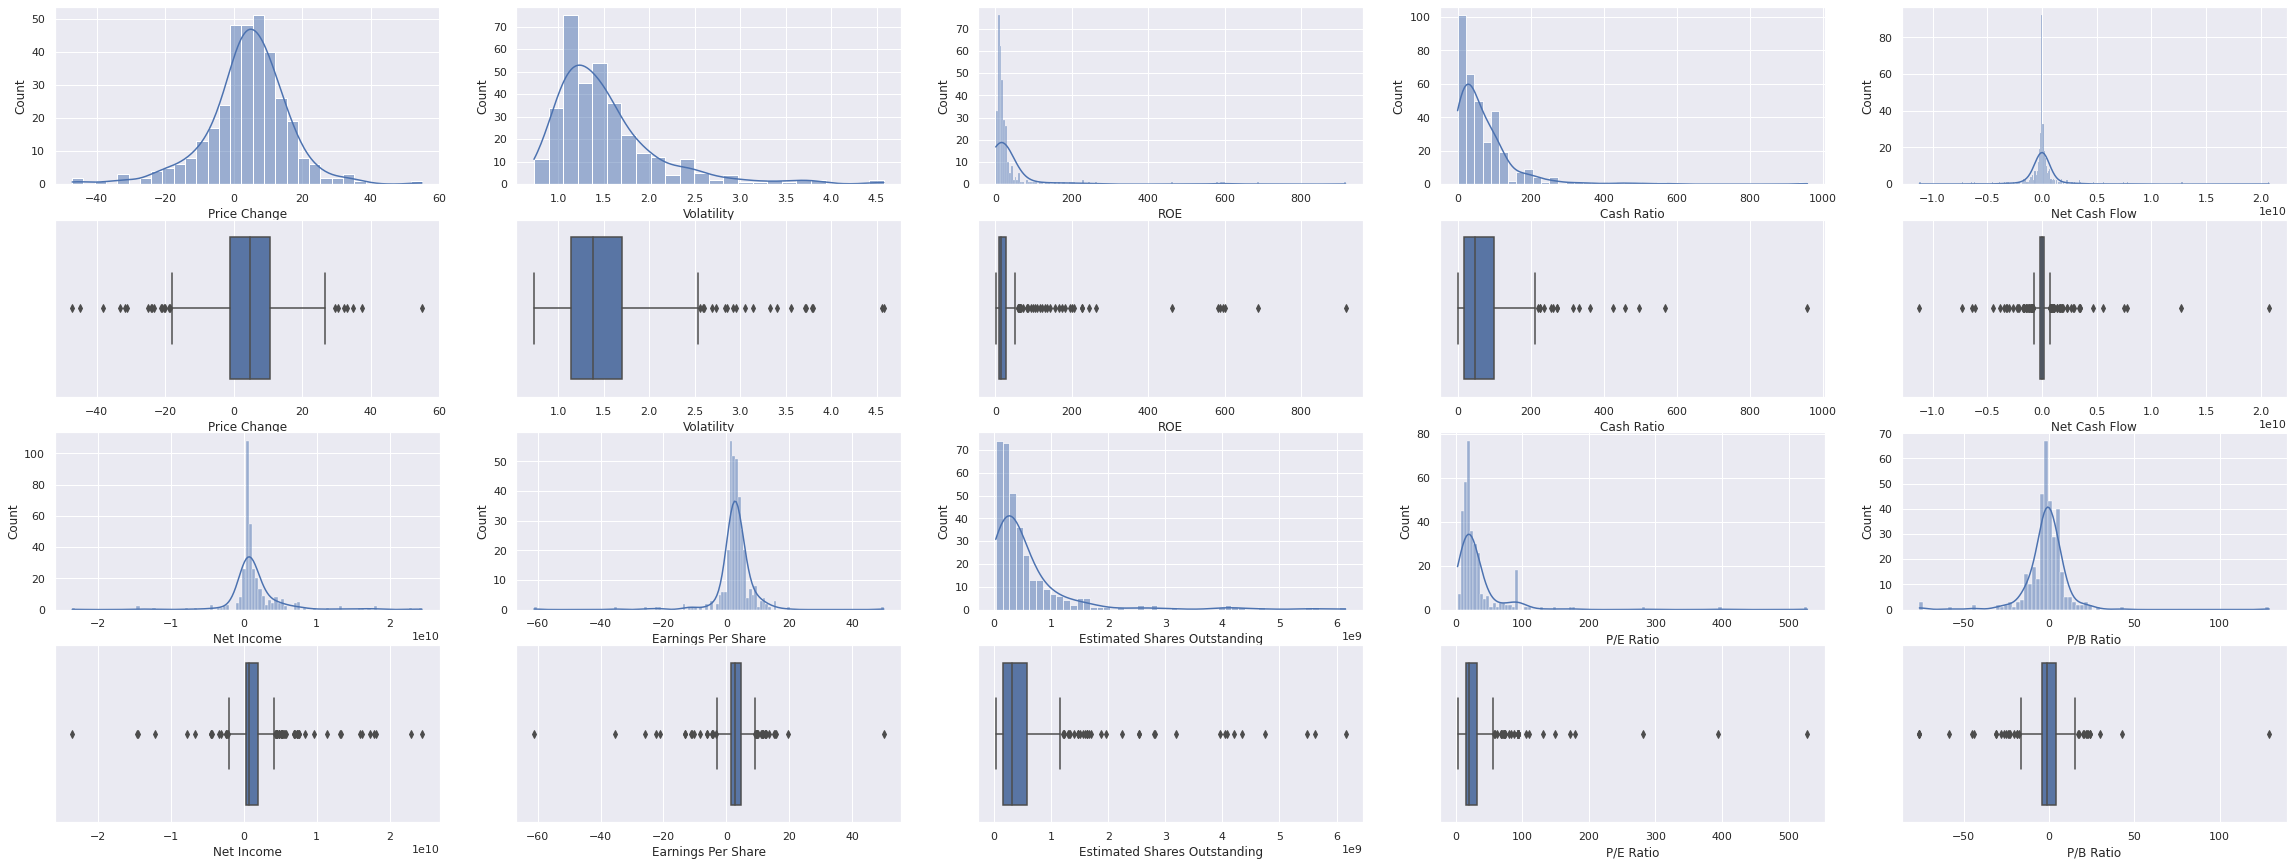

In [ ]:
#Defining subplots and filling them with the ten remaining variables, excluding the first entry, '0', which corresponds to 'Current Price' in the numerical_variables list

fig, [[ax0,ax1,ax2,ax3,ax4],[ax01,ax11,ax22,ax33,ax44],[ax5,ax6,ax7,ax8,ax9],[ax55,ax66,ax77,ax88,ax99]] = plt.subplots(nrows=4,ncols=5)

fig.set_figwidth(40)
fig.set_figheight(15)


ax_list = [ax0,ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9] #makign a list of the axes so I can access them with an index
ax_list2 = [ax01,ax11,ax22,ax33,ax44,ax55,ax66,ax77,ax88,ax99]

for i,specific_column in enumerate(numerical_variables):
  if i == 0:
    continue
  else:
    sns.histplot(data=stockData,x=specific_column,ax=ax_list[i-1],kde=True) #defining the axes as "ax=ax_list[i-1]", this puts the index in the range of 0-9
    sns.boxplot(data=stockData,x=specific_column,ax=ax_list2[i-1])

**Observations:**
- All of these columns appear to contain outliers that might be significant. I will build a method in Part B for selectively capping different columns. That way i can experiment for the best final result.
  - Excluding rare cases like the max value in Current Price, which is very clearly an outlier that should be capped. It is hard to say which of these really "need" to be capped. Capping can improve the overall scale of the columns, but at a cost of masking or over emphasizing certain outliers.


**A4) How are the different variables correlated with each other?**

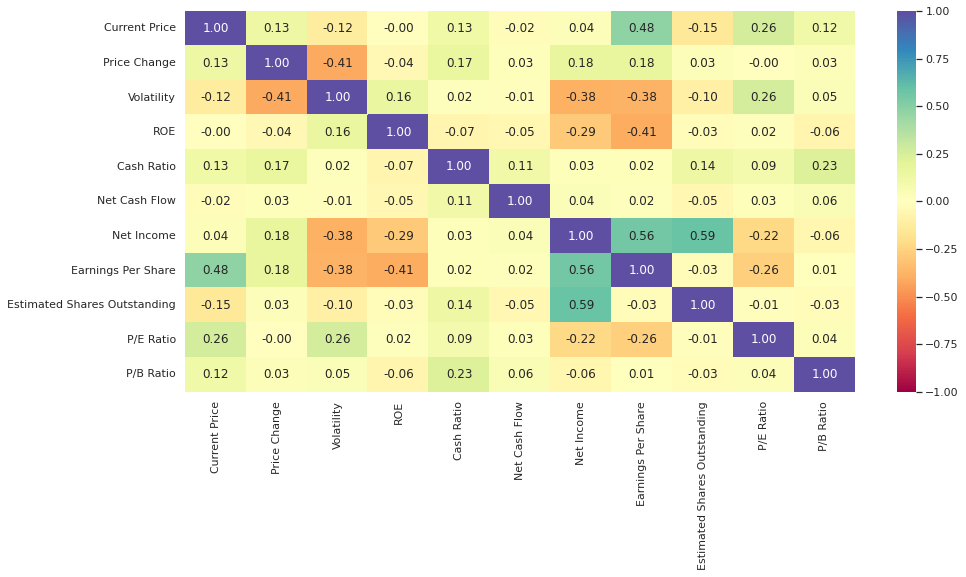

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(
    stockData[numerical_variables].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

**Observations:**
- 'Current Price' and 'Earnings Per Share' have a small correlation, which makes sense since earnings per share indicates profitability of a company and thus fetches a higher price.
  - For a similar reason, one can see that 'Net Income' has a modest correlation with 'Earnings Per Share' and 'Estimated Shares Outstanding'

**A5) Stocks of which economic sector have seen the largest price change on average?**

In [ ]:
#We need "GICS Sector" & "Price Change"
categorical_variables[1], numerical_variables[1]

('GICS Sector', 'Price Change')

In [ ]:
detailedAnalysis(stockData,categorical_variables[1],numerical_variables[1])


 ************************************************** >>>>Price Change<<<< ************************************************** 


Average values of Price Change within each GICS Sector:
GICS Sector
Consumer Discretionary          5.85
Consumer Staples                8.68
Energy                        -10.23
Financials                      3.87
Health Care                     9.59
Industrials                     2.83
Information Technology          7.22
Materials                       5.59
Real Estate                     6.21
Telecommunications Services     6.96
Utilities                       0.80
Name: Price Change, dtype: float64

----------------------------------------------------------------------------------------------------

Filtering the rows which contained values less than or equal to 0 within the `Price Change` column:

Found a total of 95 rows, out of 340
...to see detailed results, set "printResults=True"

--------------------------------------------------------------------

**Observation:**
- Health Care sector has seen the largest price increase on average(9.59). Most centered around 5-8.
- Energy contained a mostly negative Price Change with an average of 10-23.
  - 163 rows out of 340 contained a price change less than or equal to zero.

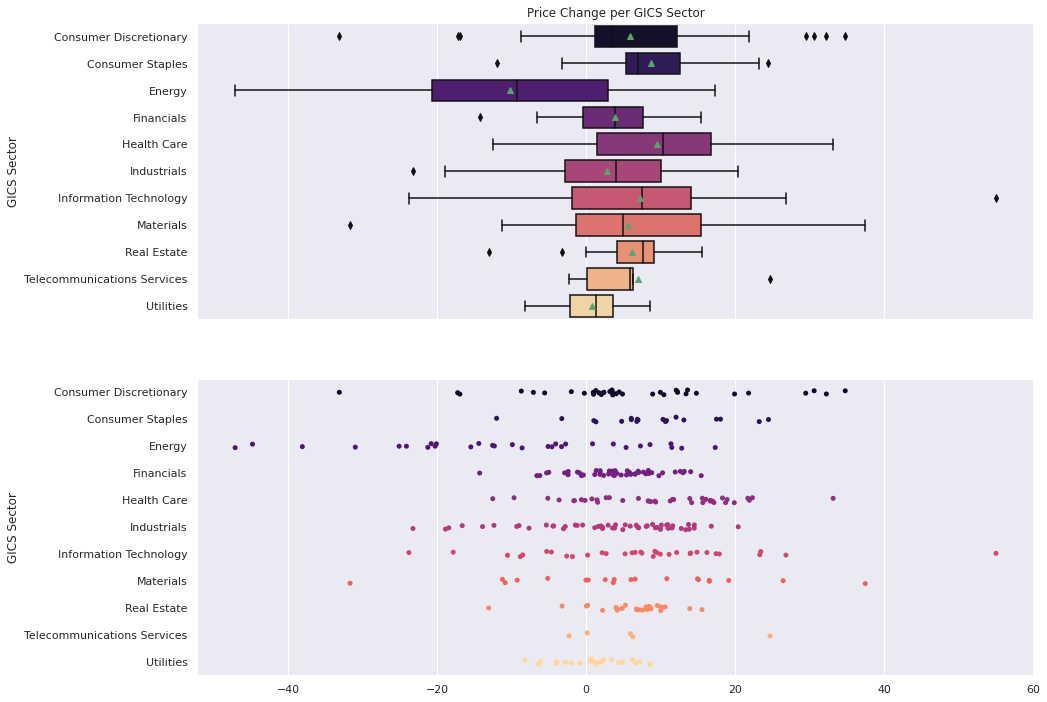

In [ ]:
detailedAnalysis(stockData,categorical_variables[1],numerical_variables[1],graph=True)

**Observations:**
- Can almost see three different groups based on mean price change.
  - Energy clearly stands out as being its own group. All of the rest would be split into two groups.
- Also Telecom Services had a pretty tight distribution considering so few observations (5).

**A higher volatility means that a security's value can potentially be spread out over a larger range of values. Did Volatility have something to do with the large swings in price change?**

First lets take a look at volatility overall.

In [ ]:
#We need "GICS Sector" & "Volatility"
categorical_variables[1], numerical_variables[2]

('GICS Sector', 'Volatility')

In [ ]:
detailedAnalysis(stockData,categorical_variables[1],numerical_variables[2])


 ************************************************** >>>>Volatility<<<< ************************************************** 


Average values of Volatility within each GICS Sector:
GICS Sector
Consumer Discretionary        1.60
Consumer Staples              1.15
Energy                        2.57
Financials                    1.27
Health Care                   1.54
Industrials                   1.42
Information Technology        1.66
Materials                     1.82
Real Estate                   1.21
Telecommunications Services   1.34
Utilities                     1.12
Name: Volatility, dtype: float64

----------------------------------------------------------------------------------------------------

Filtering the rows which contained values less than or equal to 0 within the `Volatility` column:

"Nothing Found" in Volatility

----------------------------------------------------------------------------------------------------

...set "display=True" in order to see all unique values

**Observations:**
- "Energy" has a much larger volatility than the rest with an average of 2.57. Perhaps, this is the reason why it has such a massive negative price change on average.
  - 216 out of 340 rows were less than or equal to 0, which is alot but still \~1/3 was not negative.

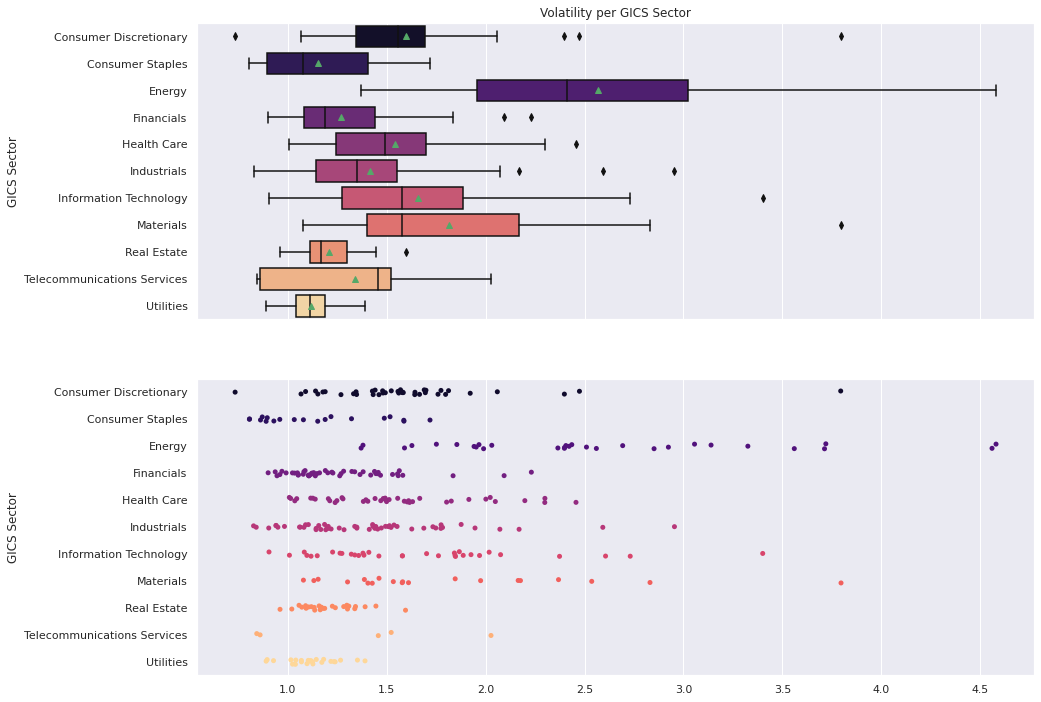

In [ ]:
detailedAnalysis(stockData,categorical_variables[1],numerical_variables[2],graph=True)

**I can see atleast 3 major clusters based on Volatility.**

**A6) Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. In other words, a measure of a companies potential liquidity. How does the average cash ratio vary across economic sectors?**

In [ ]:
#We need "GICS Sector" & "Cash Ratio"
categorical_variables[1], numerical_variables[4]

('GICS Sector', 'Cash Ratio')

In [ ]:
detailedAnalysis(stockData,categorical_variables[1],numerical_variables[4])


 ************************************************** >>>>Cash Ratio<<<< ************************************************** 


Average values of Cash Ratio within each GICS Sector:
GICS Sector
Consumer Discretionary         49.58
Consumer Staples               70.95
Energy                         51.13
Financials                     98.59
Health Care                   103.78
Industrials                    36.19
Information Technology        149.82
Materials                      41.70
Real Estate                    50.11
Telecommunications Services   117.00
Utilities                      13.62
Name: Cash Ratio, dtype: float64

----------------------------------------------------------------------------------------------------

Filtering the rows which contained values less than or equal to 0 within the `Cash Ratio` column:

Found a total of 4 rows, out of 340
Sorted by `Cash Ratio` and "bottomFirst" is currently True: 

     Security                GICS Sector             GICS Sub Indust

**Observations:**
- Average Cash Ratio ranged from as low as 13 to as high as 150 with most of them around the 50-80 range.
- Four rows with Cash Ratio equal to "0". These were either rounded off to zero, missing, or actually 0.
  - From everything I found cash ratio is supposed to be around 0.5-1, so I assume this column has been treated in some way and decided to leave it alone.
- Information Technology had a higher average cash ratio than the rest of the sectors.

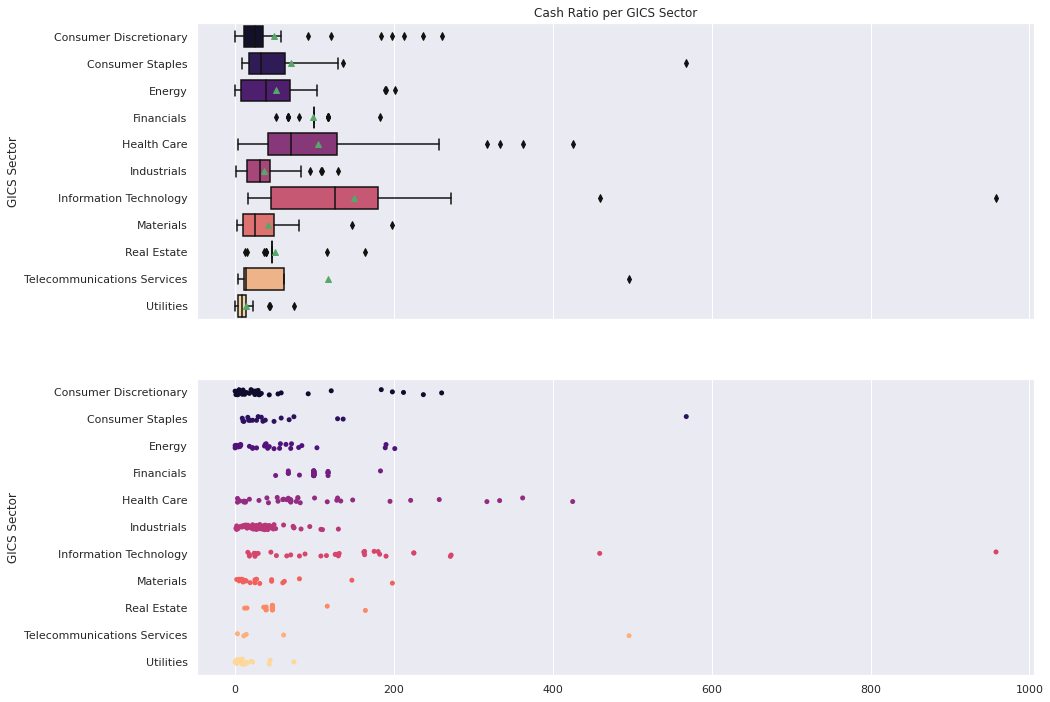

In [ ]:
detailedAnalysis(stockData,categorical_variables[1],numerical_variables[4],graph=True)

**Observations:**
- One can see atleast three seperate clusters.
  -  Also, one can see that the outlier is actually a part of what distinguishes the third group to the right.

**A7) P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?**

In [ ]:
#We need "GICS Sector" & "P/E Ratio"
categorical_variables[1], numerical_variables[9]

('GICS Sector', 'P/E Ratio')

In [ ]:
detailedAnalysis(stockData,categorical_variables[1],numerical_variables[9])


 ************************************************** >>>>P/E Ratio<<<< ************************************************** 


Average values of P/E Ratio within each GICS Sector:
GICS Sector
Consumer Discretionary        35.21
Consumer Staples              25.52
Energy                        72.90
Financials                    16.02
Health Care                   41.14
Industrials                   18.26
Information Technology        43.78
Materials                     24.59
Real Estate                   43.07
Telecommunications Services   12.22
Utilities                     18.72
Name: P/E Ratio, dtype: float64

----------------------------------------------------------------------------------------------------

Filtering the rows which contained values less than or equal to 0 within the `P/E Ratio` column:

"Nothing Found" in P/E Ratio

----------------------------------------------------------------------------------------------------

...set "display=True" in order to see all unique 

**Observations:**
- Did not find any missing values less than or equal to zero.
- Overall P/E Ratio was as low as 12.22 in Telecom Services and as high as 72.9 in Energy with most around the 16-24 range

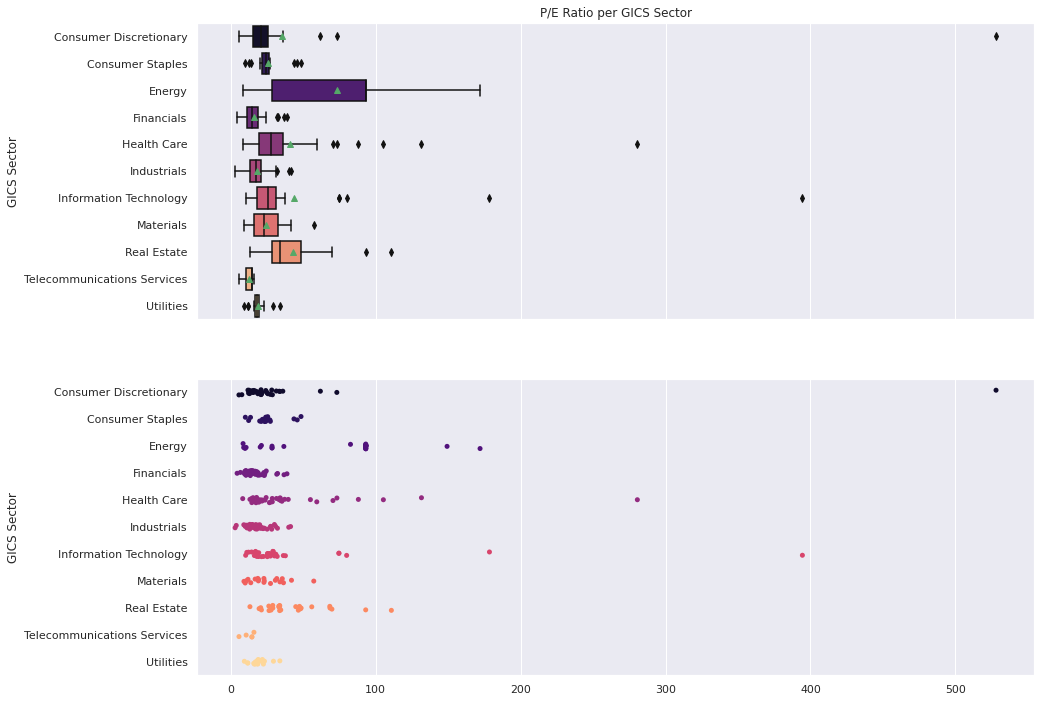

In [ ]:
detailedAnalysis(stockData,categorical_variables[1],numerical_variables[9],graph=True)

**Atleast three groups appears to be present**

**Lets take a look at the distribution of Current Price. How does it vary across economic sectors?**

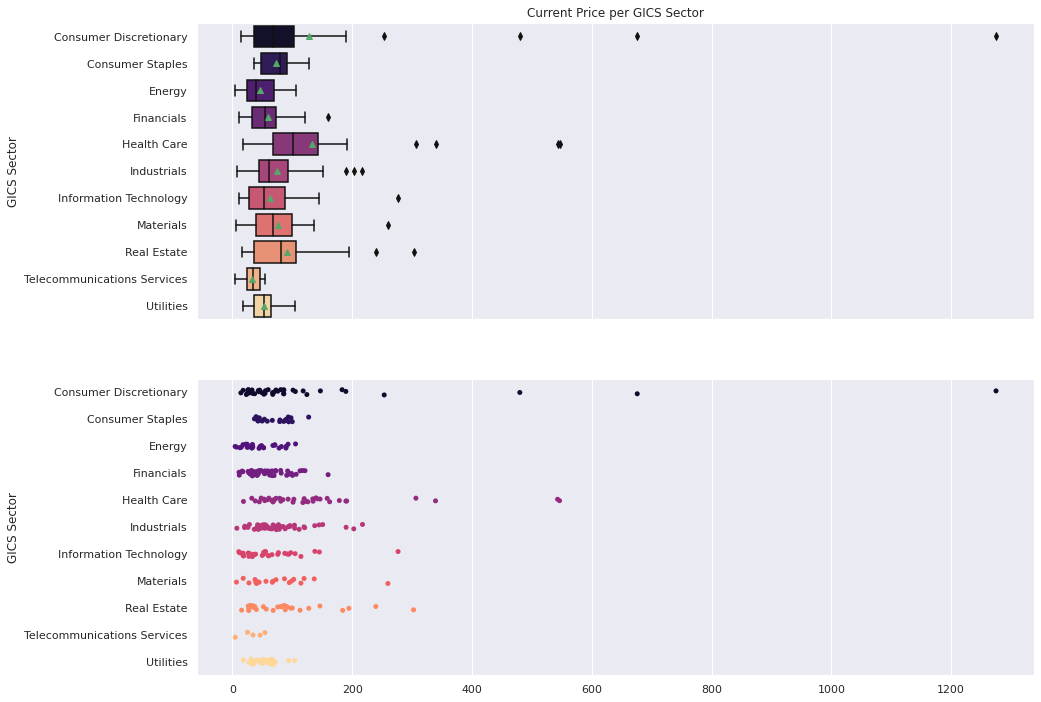

In [ ]:
detailedAnalysis(stockData,categorical_variables[1],numerical_variables[0],graph=True)

**Observations:**
- Seems to be at most three clusters, but it is a rather tight grouping.
- The outermost outlier could be brought in a bit more without throwing off the overall distribution.
- Telecomunication Services has a tight grouping near the lower end in both Current Price and P/E.

**A8) P/B ratios can help determine stocks that are overvalued. In general the ROE should grow along with the P/B. Otherwise this can indicate investors do not believe the growth will continue into the future because the price per book value is low despite the company reaching record ROE.**

In [ ]:
#We need "GICS Sector" & "P/B Ratio"
categorical_variables[1], numerical_variables[10]

('GICS Sector', 'P/B Ratio')

In [ ]:
detailedAnalysis(stockData,categorical_variables[1],numerical_variables[10])


 ************************************************** >>>>P/B Ratio<<<< ************************************************** 


Average values of P/B Ratio within each GICS Sector:
GICS Sector
Consumer Discretionary         -8.25
Consumer Staples               -4.55
Energy                          2.54
Financials                     -4.27
Health Care                     0.07
Industrials                    -0.98
Information Technology          6.38
Materials                       0.72
Real Estate                    -3.00
Telecommunications Services   -11.01
Utilities                      -3.09
Name: P/B Ratio, dtype: float64

----------------------------------------------------------------------------------------------------

Filtering the rows which contained values less than or equal to 0 within the `P/B Ratio` column:

Found a total of 210 rows, out of 340
...to see detailed results, set "printResults=True"

-------------------------------------------------------------------------------

**Observations:**
- Mostly negative with a minimum of -11.01 and maximum of 6.38 for IT. Energy was the only other mostly positive besides IT.
- Notice the exceedingly high average P/B ratio  for Telecom is not special when compared against the rest in graph below. Perhaps including more telecom companies would improve precision here.

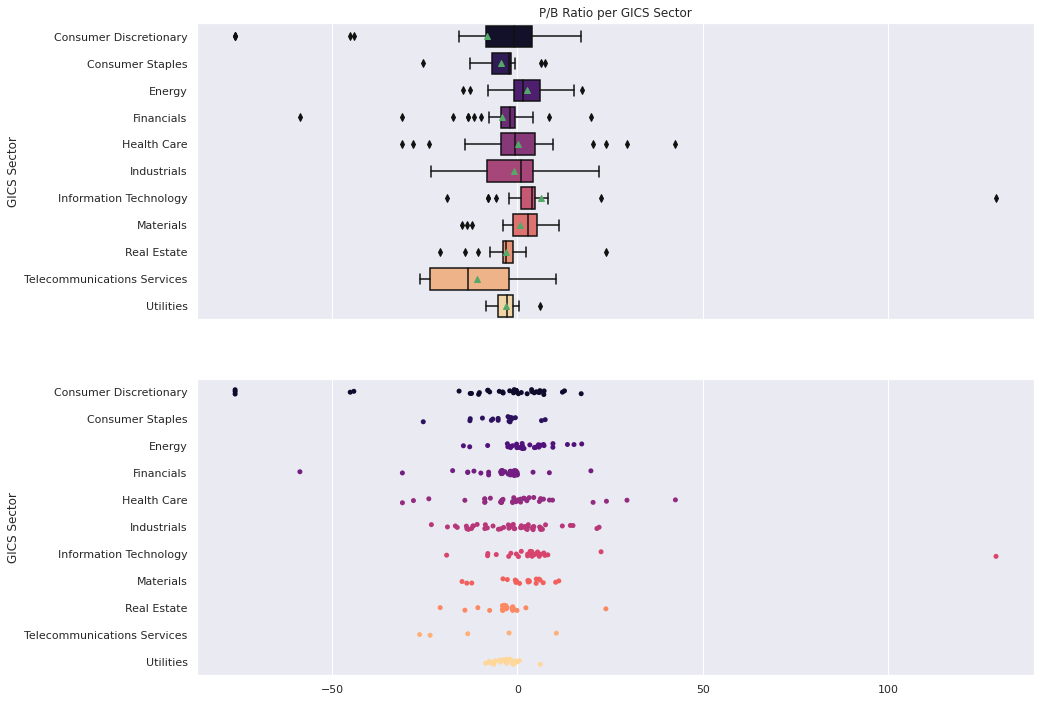

In [ ]:
detailedAnalysis(stockData,categorical_variables[1],numerical_variables[10],graph=True)

**Can see about three clusters here**

**A9) Return on equity (ROE) is a measure of financial performance calculated by dividing net income by shareholders' equity. ROE is a gauge of a corporation's profitability and how efficiently it generates those profits. How much did ROE vary across the different economic sectors?**

In [ ]:
#We need "GICS Sector" & "ROE"
categorical_variables[1], numerical_variables[3]

('GICS Sector', 'ROE')

In [ ]:
detailedAnalysis(stockData,categorical_variables[1],numerical_variables[3])


 ************************************************** >>>>ROE<<<< ************************************************** 


Average values of ROE within each GICS Sector:
GICS Sector
Consumer Discretionary        44.90
Consumer Staples              89.42
Energy                        93.20
Financials                    26.29
Health Care                   27.77
Industrials                   50.15
Information Technology        21.79
Materials                     33.00
Real Estate                   12.44
Telecommunications Services   32.60
Utilities                      9.88
Name: ROE, dtype: float64

----------------------------------------------------------------------------------------------------

Filtering the rows which contained values less than or equal to 0 within the `ROE` column:

"Nothing Found" in ROE

----------------------------------------------------------------------------------------------------

...set "display=True" in order to see all unique values


**Observations:**
- Mostly around 20-40 range on average with a minimum of 9.88 in Utilities and a maximum of 93.20 from Energy sector.
  - Consumer Staples is a close second with around 89.42 ROE on average.

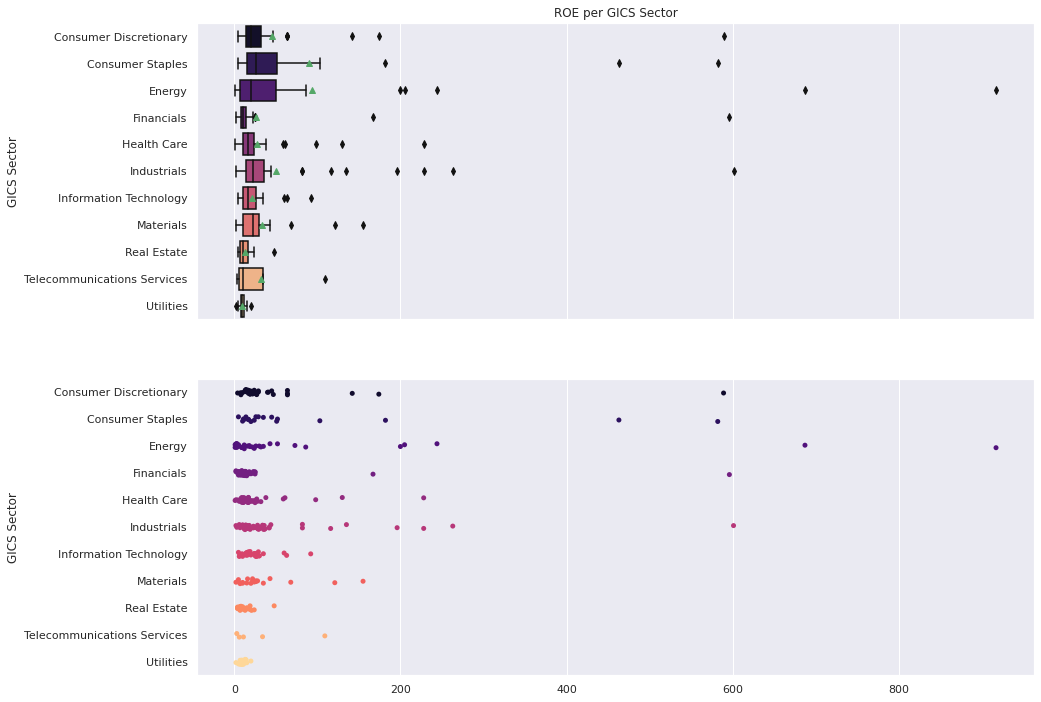

In [ ]:
detailedAnalysis(stockData,categorical_variables[1],numerical_variables[3],graph=True)

**Observations:**
 - A great example of an outlier that will interfere with the clustering. One can see how it might distort the distance between the points to the left, but does not add alot of value to clustering seperated like that.
 - Seeing atleast three clusters. Four does not seem impossible even if outlier is capped.
 - in fact, I bet capping the outlier will help the detection of a fourth group.

### **PART B** - **Outlier and Missing Analysis**

**Here I went through and decided on some arbitrary min/max caps for all variables. I use the graph above to point me in the right direction, and then focus in on unique values listed below to see what will have the most minimal impact. In the code block I make two convenient lists to selectively cap the variables in preprocessing. It will make sense later on and essentially this streamlines the process of experimenting with different outlier treatments. I am not committing to anything here.**

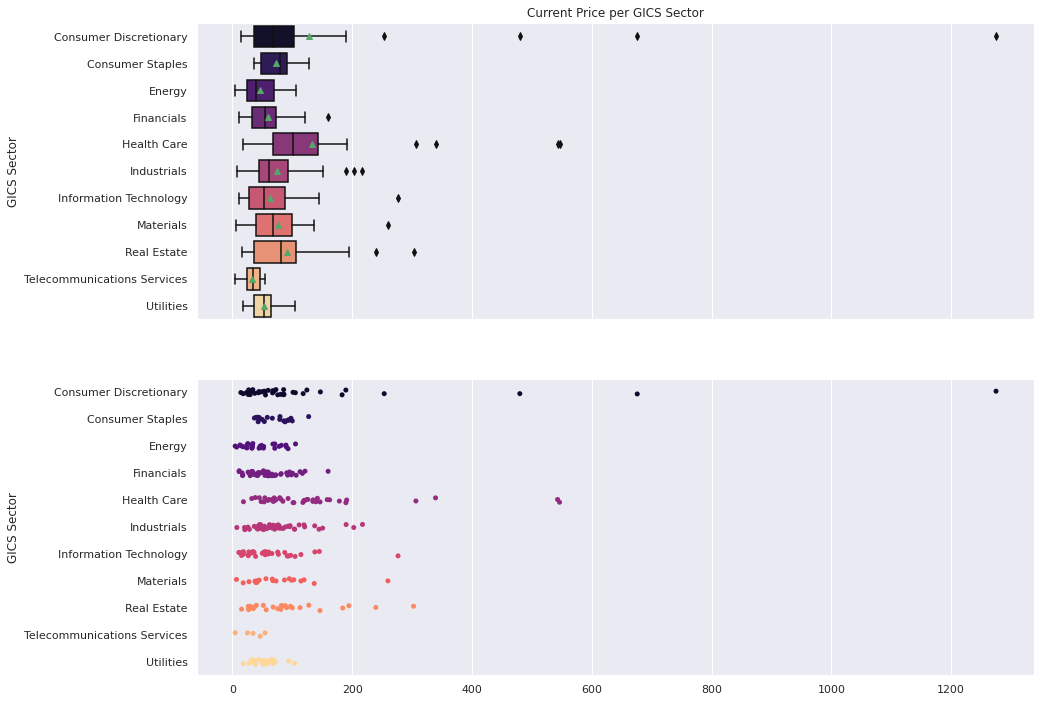

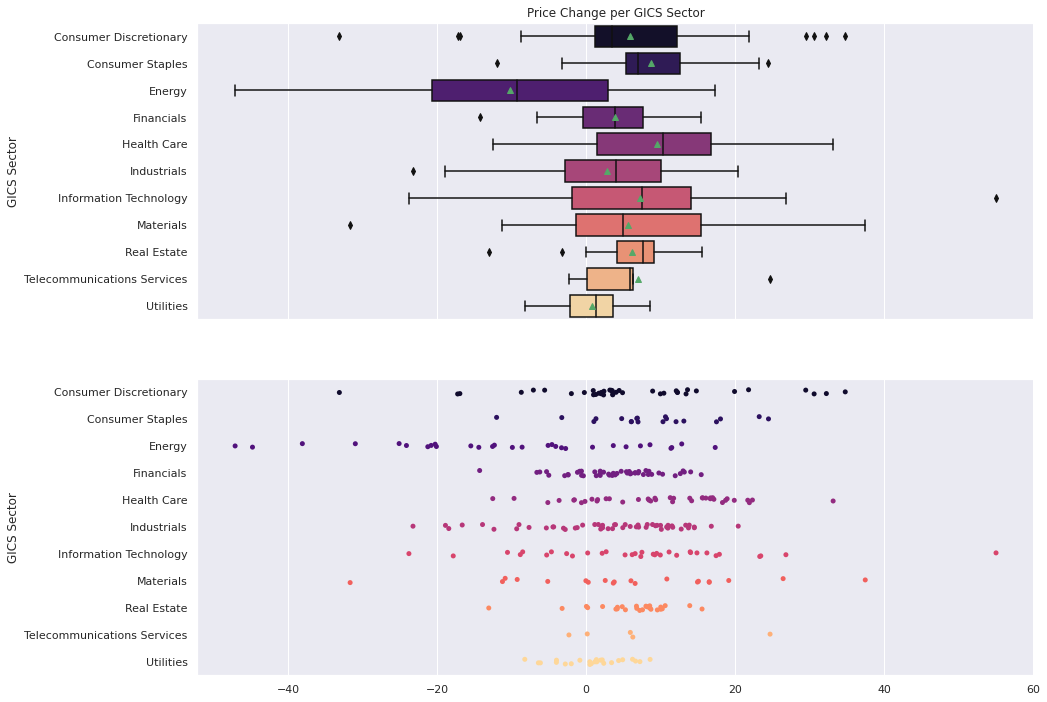

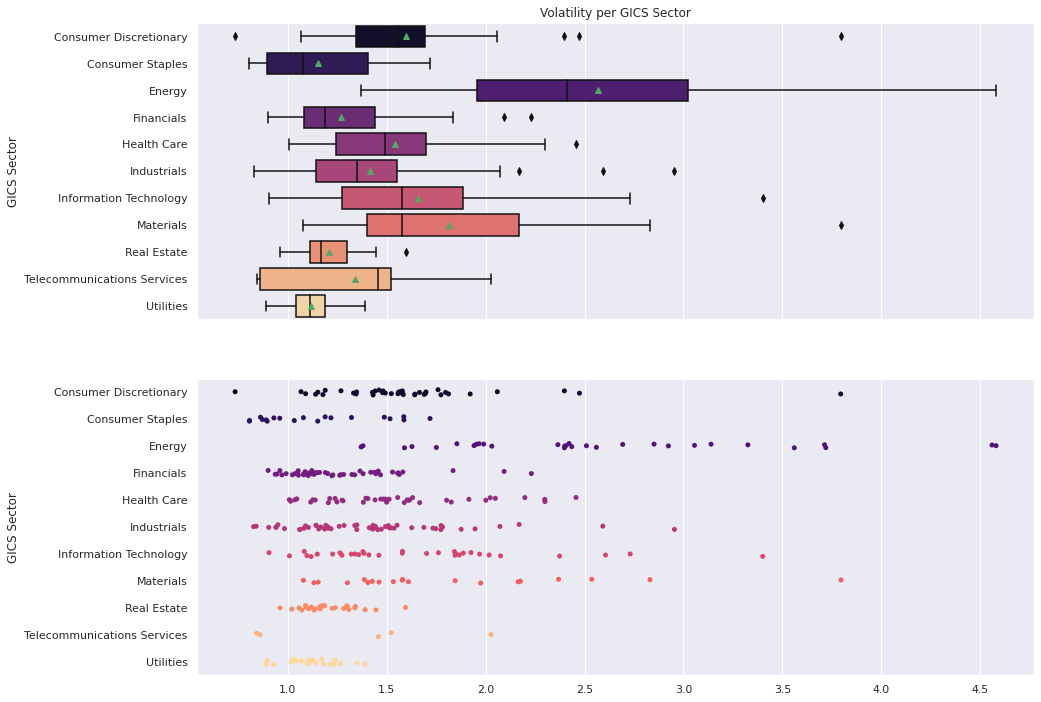

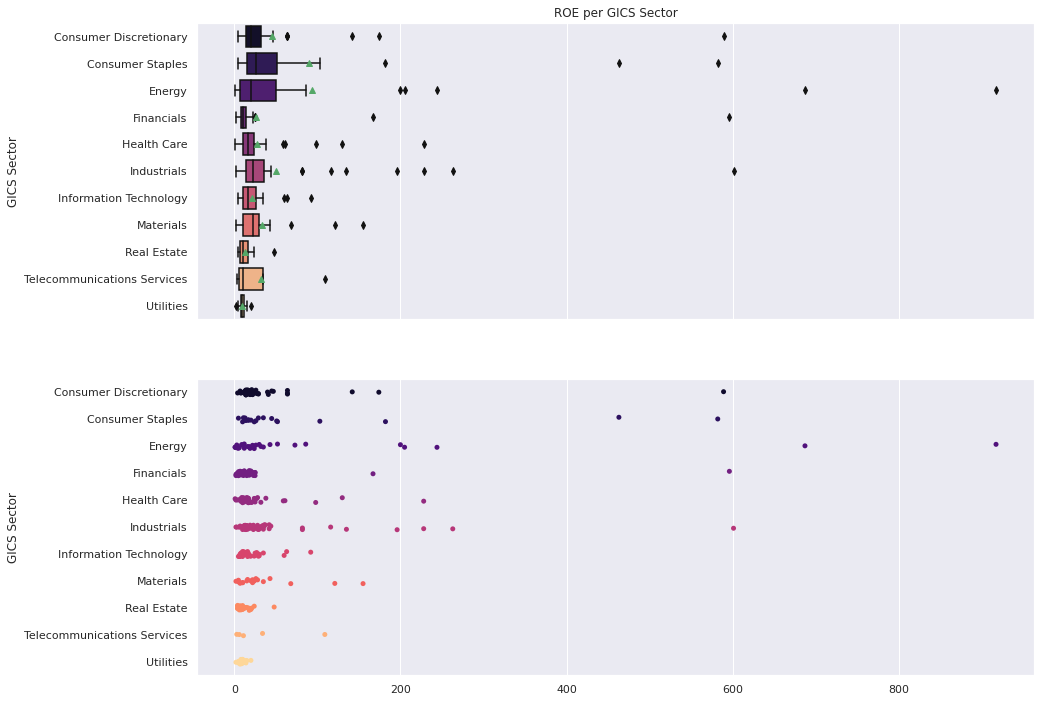

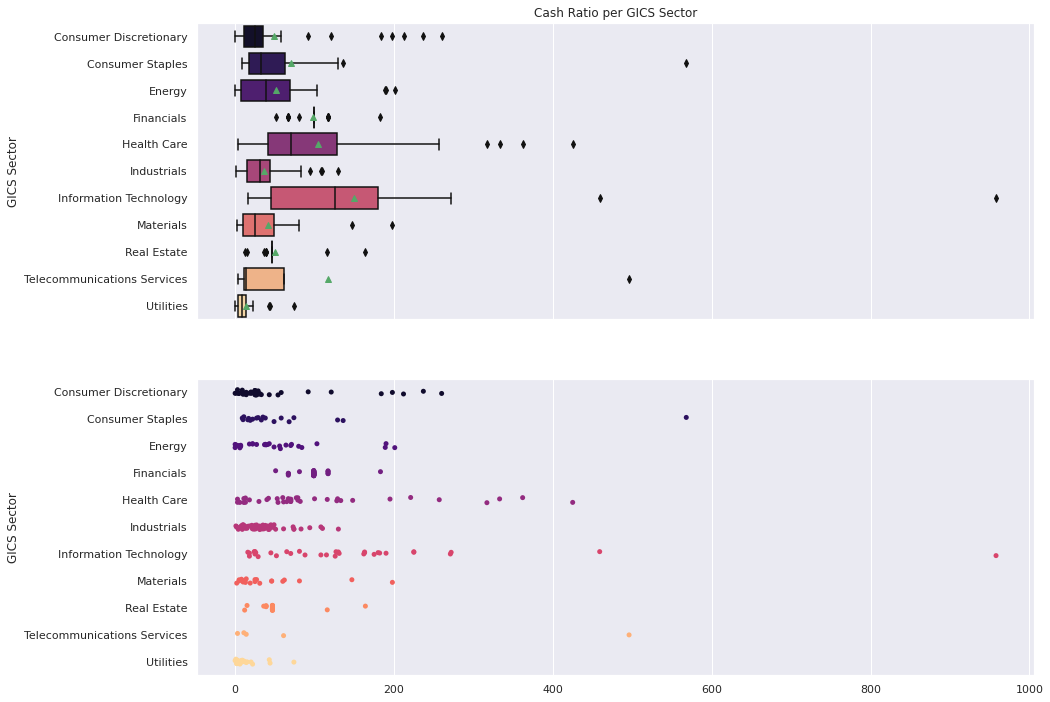

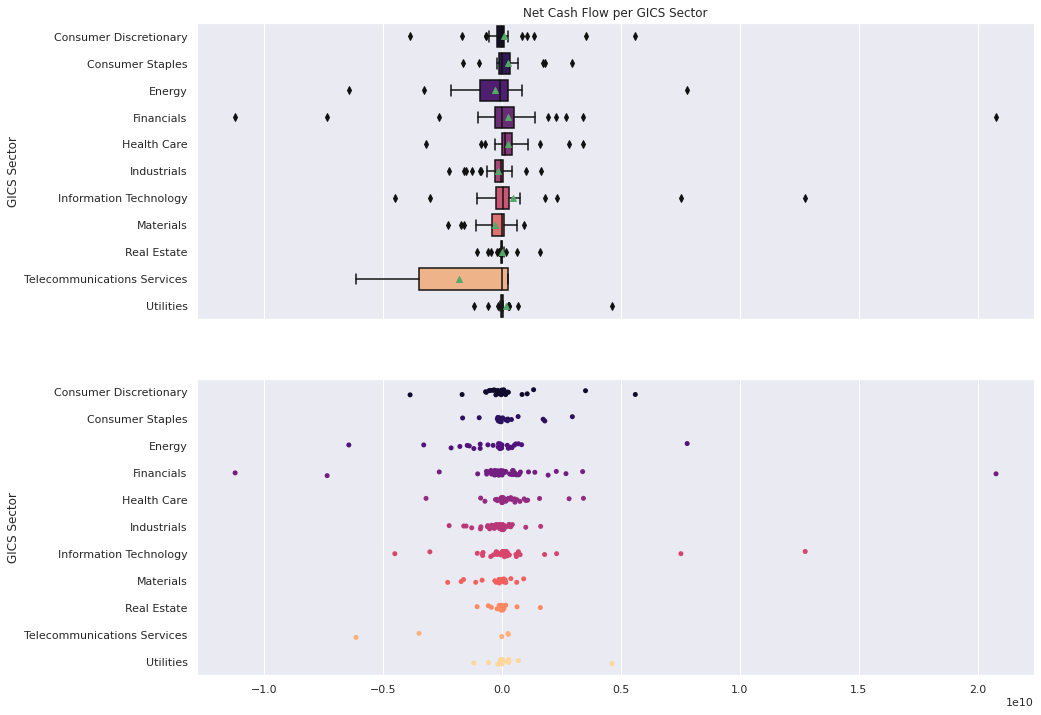

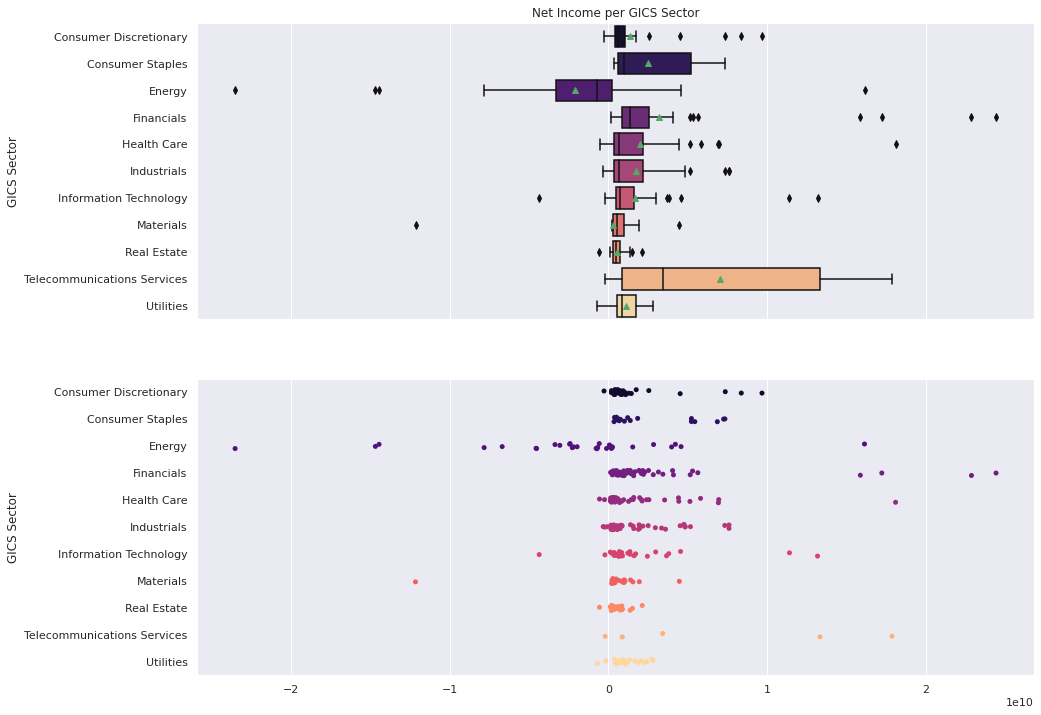

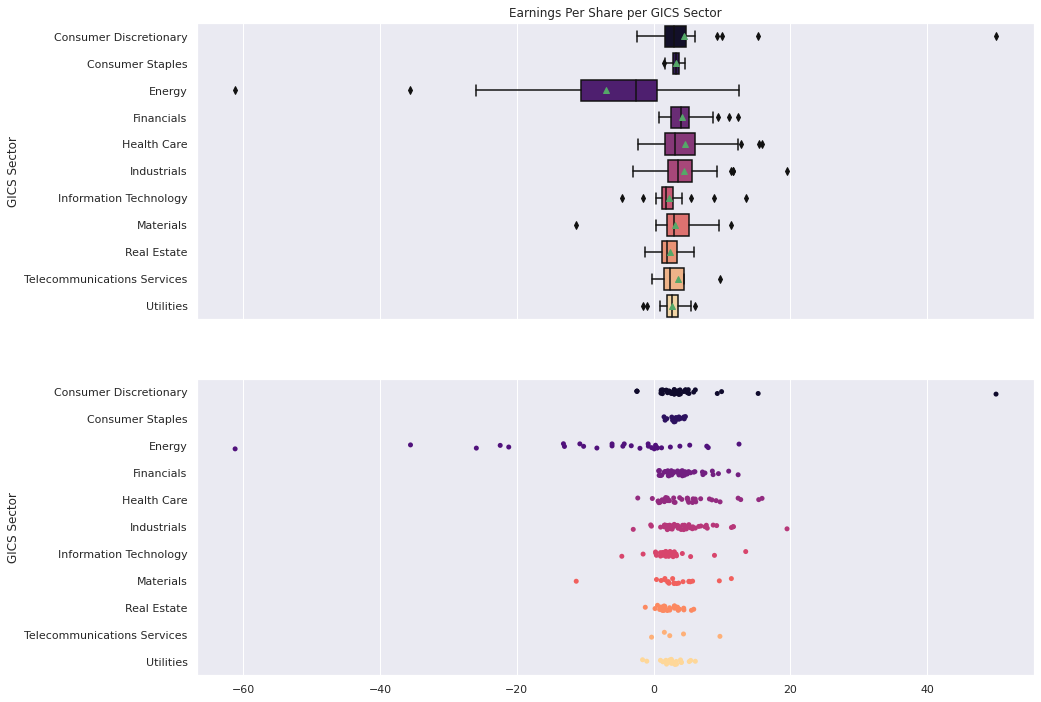

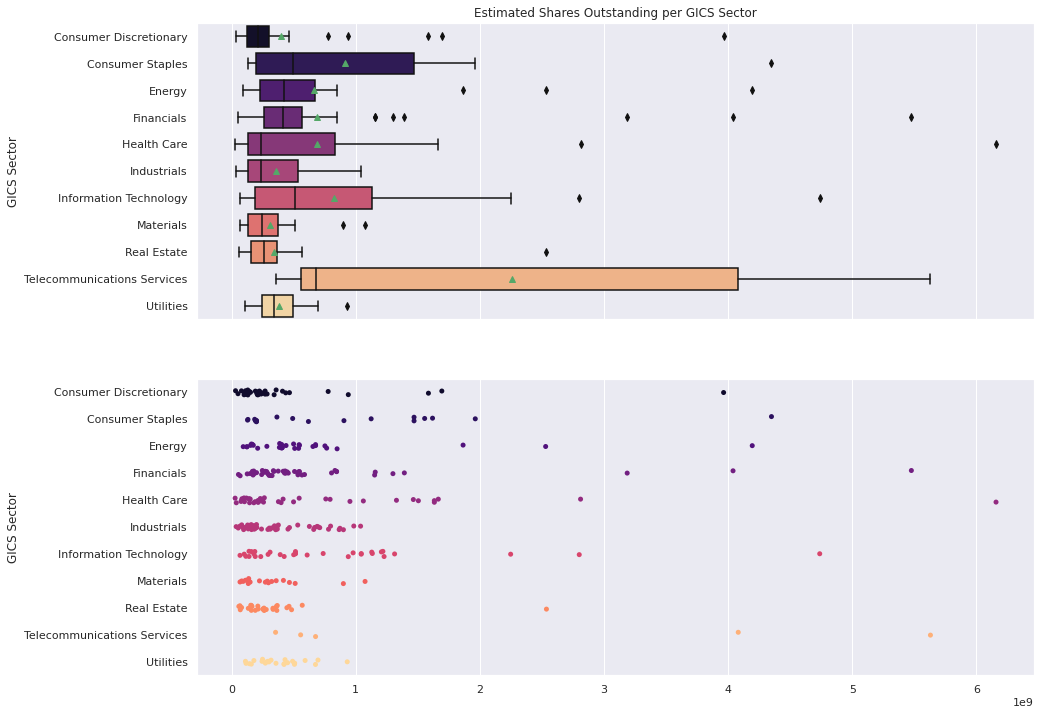

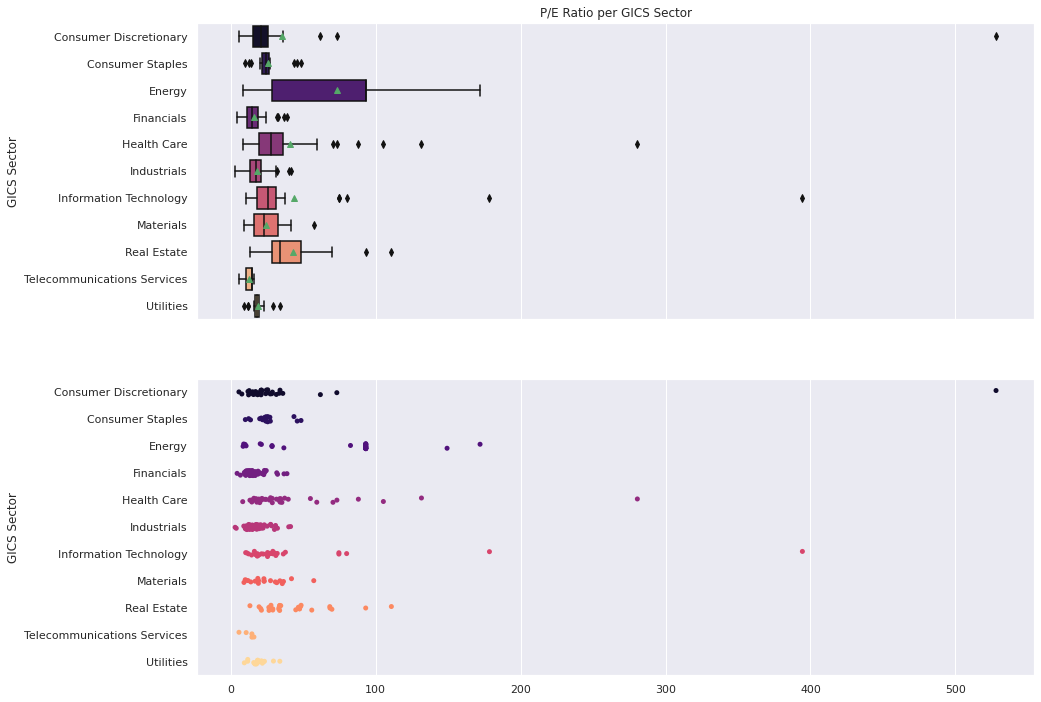

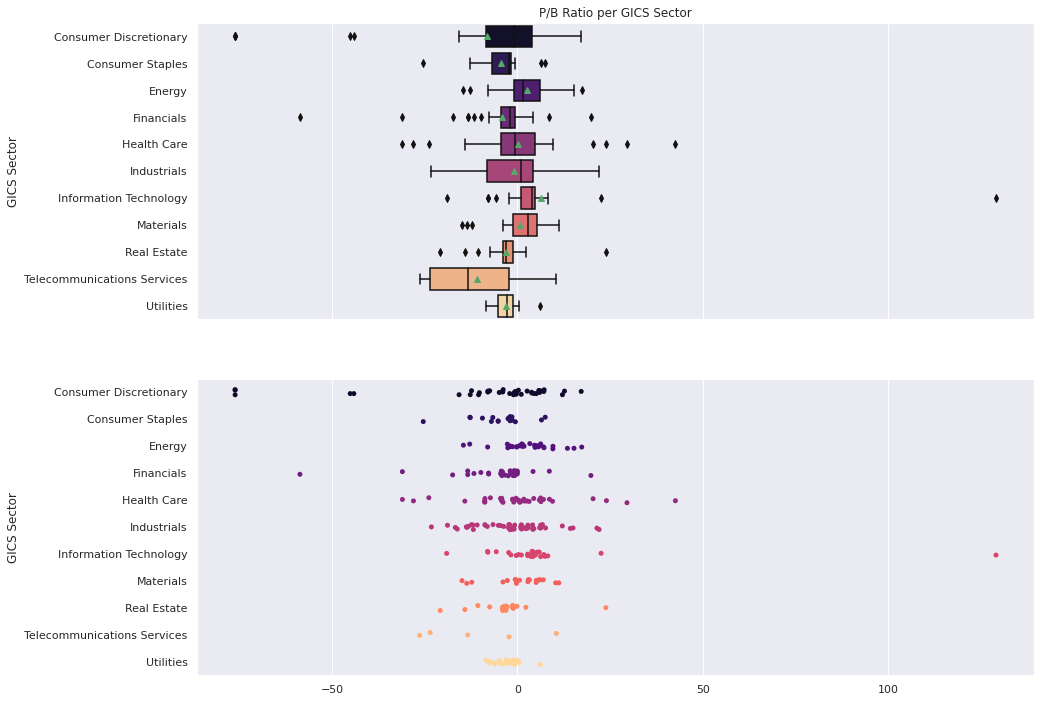

In [ ]:
for i in range(0,len(numerical_variables)):
  detailedAnalysis(stockData,categorical_variables[1],numerical_variables[i],graph=True)

In [ ]:
for i in range(0,len(numerical_variables)):
  detailedAnalysis(stockData,categorical_variables[1],numerical_variables[i],display=True)


 ************************************************** >>>>Current Price<<<< ************************************************** 

Displaying all of the unique values withing each GICS Sector

1. Consumer Discretionary:
[  14.09         17.82         23.280001     25.219999     25.52
   26.68         27.17         29.629999     32.669998     34.009998
   37.169998     43.23         44.080002     45.389999     48.91
   52.51617541   54.48         55.209999     59.66         67.040001
   67.360001     69.190002     72.650002     75.660004     80.610001
   85.25         85.5          85.730003     85.889999    101.209999
  105.080002    118.139999    124.300003    146.869995    183.100006
  189.389999    253.419998    479.850006    675.890015   1274.949951  ]

2. Consumer Staples:
[ 36.68        39.540001    42.4399985   42.959999    44.84
  49.65333167  53.330002    58.209999    66.620003    78.949997
  79.410004    85.559998    87.910004    89.269997    93.199997
  93.919998    97.769997  

**Outlier Capping List:**

0) `Current Price`
  - Maximum: '700'
  - Minimum: '0'

1) `Price Change`
  - Maximum: '40'
  - Minimum: '-40'

2) `Volatility`
  - Maximum: '4'
  - Minimum: '015000000000'

3) `ROE`
  - Maximum: '600'
  - Minimum: '0'

4) `Cash Ratio`
  - Maximum: '600'
  - Minimum: '1'

5) `Net Cash Flow`
  - Maximum: '15000000000'
  - Minimum: '-15000000000'

6) `Net Income`
  - Maximum: '20000000000'
  - Minimum: '-20000000000'

7) `Earnings Per Share`
  - Maximum: '40'
  - Minimum: '-40'

8) `Estimated Shares Outstanding`
  - Maximum: '6000000000'
  - Minimum: '0'

9) `P/E Ratio`
  - Maximum: '400'
  - Minimum: '0'
  
10) `P/B Ratio`
  - Maximum: '100'
  - Minimum: '-100'

**Observations:**
- Overall the outlier caps I would like to try are 0,3,4,5,6,7,8,9,10
  - I may not end up using any of them, but now I can try whatever I want with great ease.

## Data Preprocessing

In [ ]:
# Setting the limits based on Part B of EDA
upper_limit = [
    700, 40, 4, 600, 600, 15000000000, 20000000000, 40, 6000000000, 400, 100
]

lower_limit = [
    0, -40, 0.5, 0, 1, -15000000000, -20000000000, -40, 0, 0, -100
]

In [ ]:
# making a save point for reproducibility when testing
stockData = df.copy()
stockData.drop('Ticker Symbol',axis=1,inplace=True)

In [ ]:
# Duplicate value check
stockData.duplicated().sum()

0

In [ ]:
# No missing values found in EDA
stockData.isna().sum()

Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

In [ ]:
# Making a list of the outliers I want to cap based on list defined in EDA basically I ened up only capping ROE and Current Price after experimenting with different results this is in the ball park if not the best result
outlier_list = [0,3]

for i in [outlier_list]:
  print(numerical_variables[i])

Index(['Current Price', 'ROE'], dtype='object')


In [ ]:
# Now let's replace the outliers by the maximum and minimum limits set in EDA

for i in outlier_list: #notice this step is tying together results from EDA and preprocessing automatically in a way that I can adjust by including/excluding certain numers between 0-10 in the outlier list

  stockData[numerical_variables[i]]= np.where(stockData[numerical_variables[i]] > upper_limit[i], upper_limit[i],
                       np.where(stockData[numerical_variables[i]] < lower_limit[i], lower_limit[i], stockData[numerical_variables[i]])) # Notice all it is doing is accessing the numerical_variable[i] and upper/lower limit[i] that corresponds to that variable
                       # np.where statement is used to selectively return the upper limit or lower limit if it is exceeded

In [ ]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = stockData[numerical_variables].copy()
subset_scaled = scaler.fit_transform(subset)

In [ ]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

In [ ]:
# lets get a look at what will ultimately be the basis for clustering
print(tabulate(subset_scaled_df.head(15),headers=subset.columns))

      Current Price    Price Change    Volatility         ROE    Cash Ratio    Net Cash Flow    Net Income    Earnings Per Share    Estimated Shares Outstanding    P/E Ratio    P/B Ratio
--  ---------------  --------------  ------------  ----------  ------------  ---------------  ------------  --------------------  ------------------------------  -----------  -----------
 0       -0.456101        0.49395       0.272749    1.10513      -0.210698       -0.339355       1.55442               1.3094                          0.107863    -0.652487    -0.506653
 1       -0.246886        0.355439      1.13704     1.04792       0.0772689      -0.00233477     0.927628              0.0567549                       1.25027     -0.311769    -0.504205
 2       -0.42439         0.602479     -0.427007   -0.19914      -0.0334875       0.454058       0.744371              0.0248307                       1.09802     -0.391502     0.0949408
 3        0.182938        0.825696     -0.284802   -0.336431      1

**Looks good so far**

## EDA

**Lets take a look at the columns that had outliers capped.**

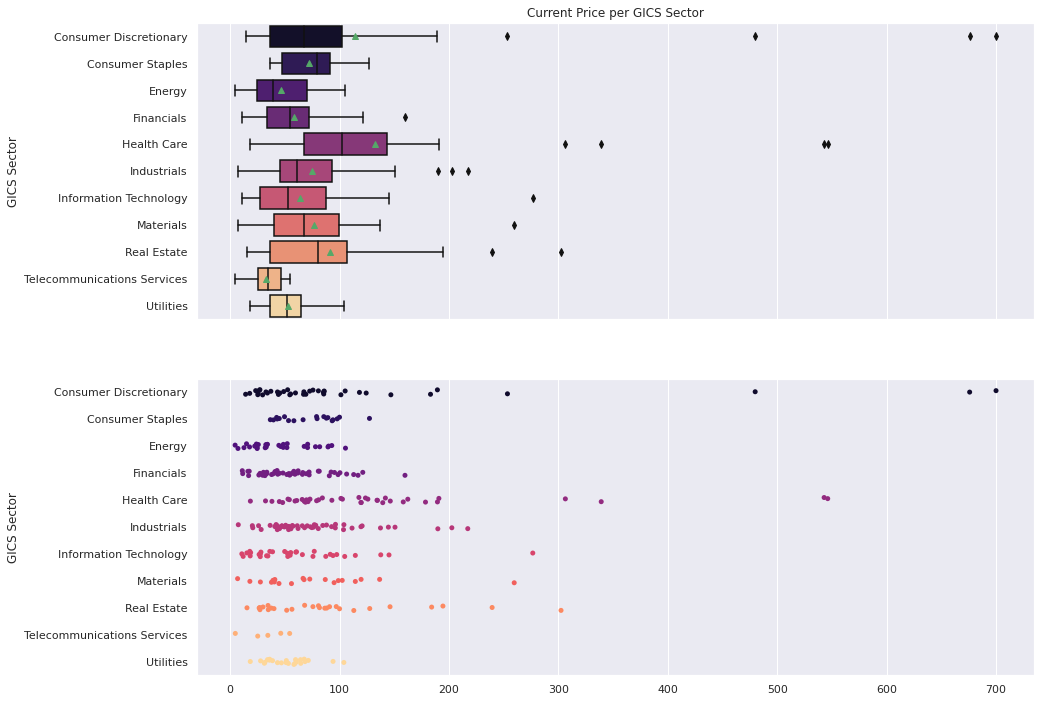

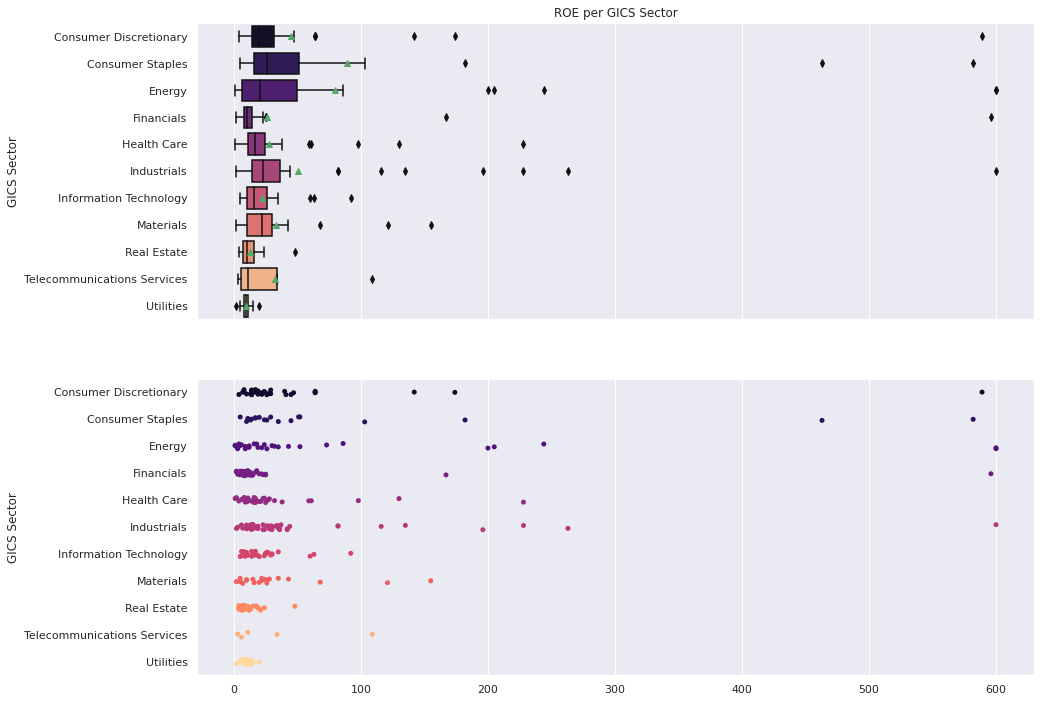

In [ ]:
for i in outlier_list:
  detailedAnalysis(stockData,categorical_variables[1],numerical_variables[i],graph=True)

**Notice how the outlier capping process did not distort the appearance of the data overall. I just zoomed in a tiny bit to get a better focus.**

**Lets take a look at scaled data frame.**

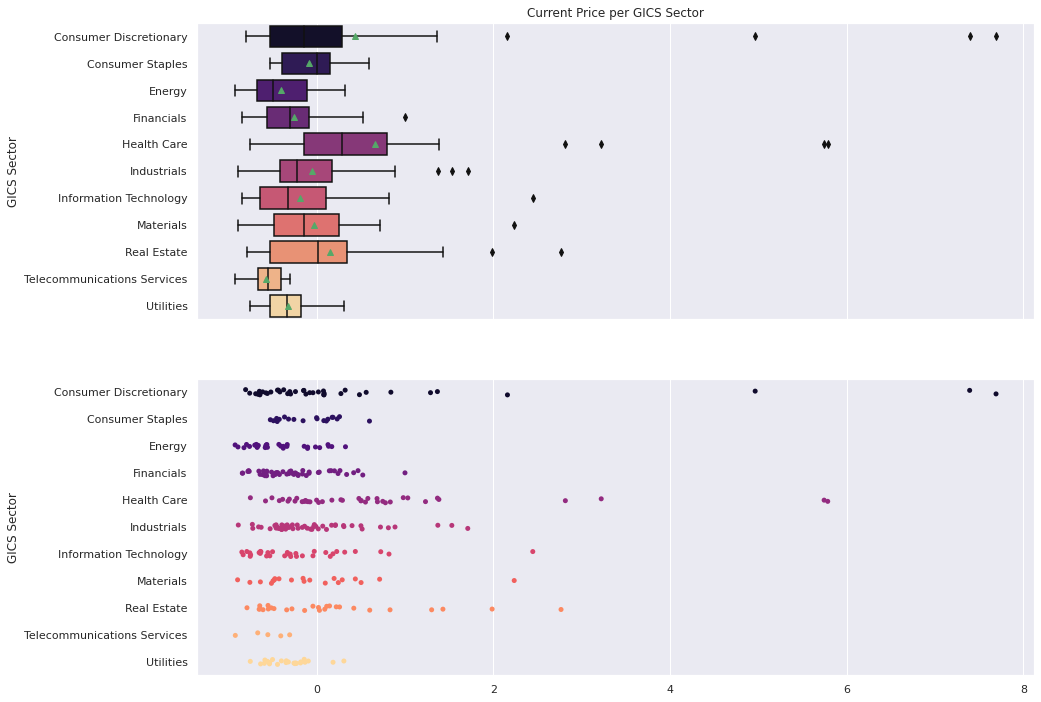

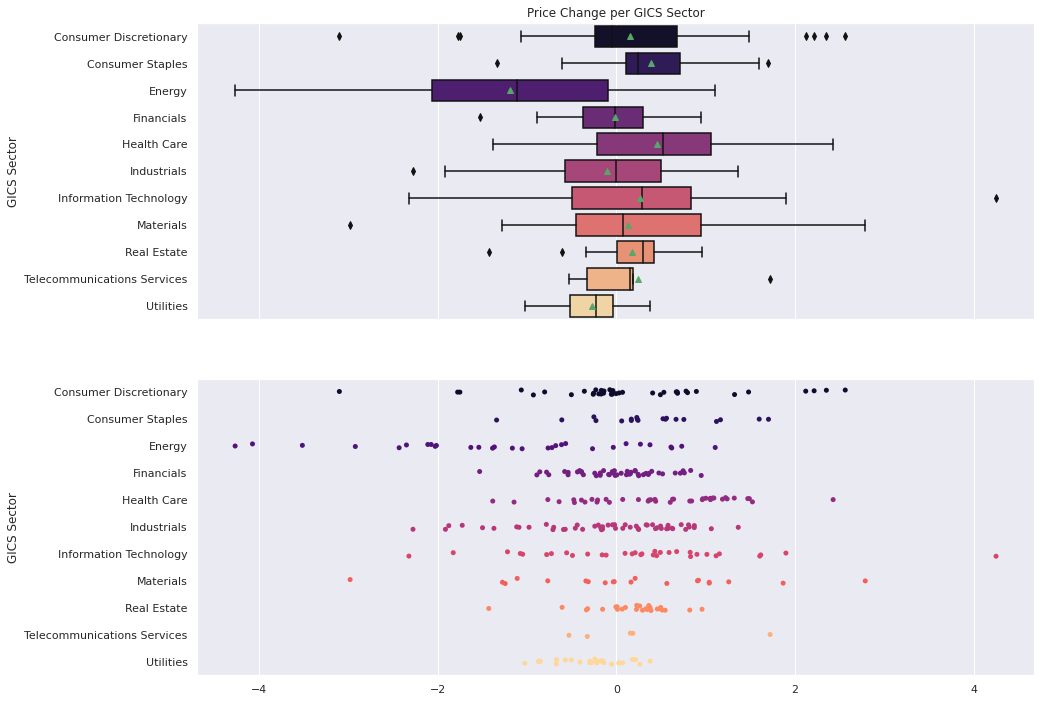

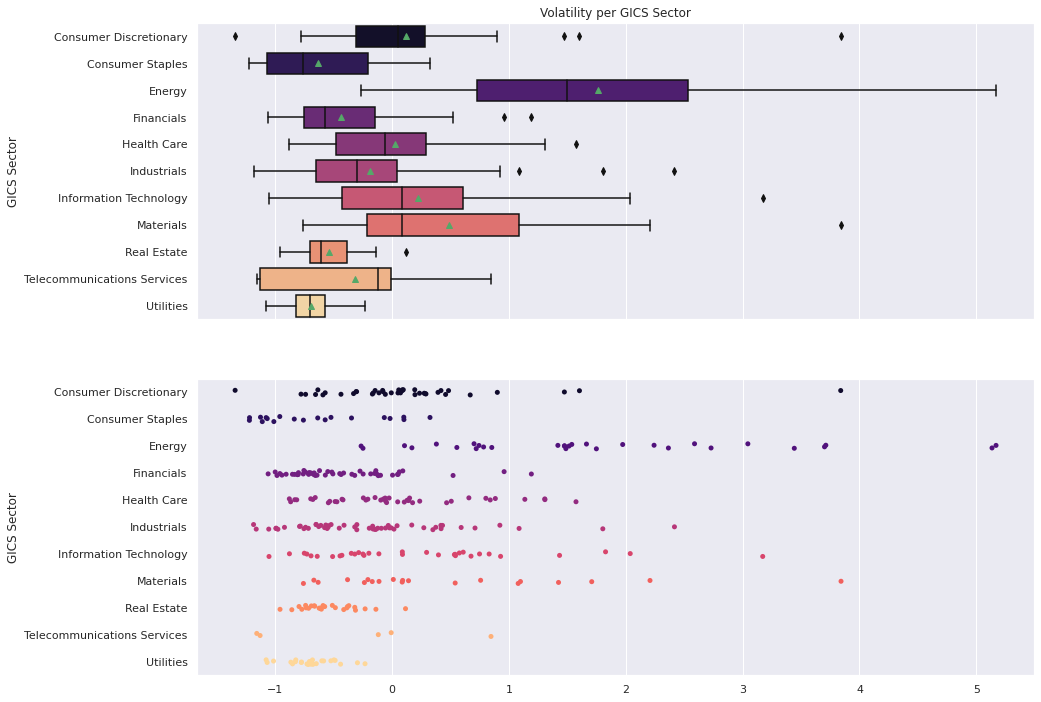

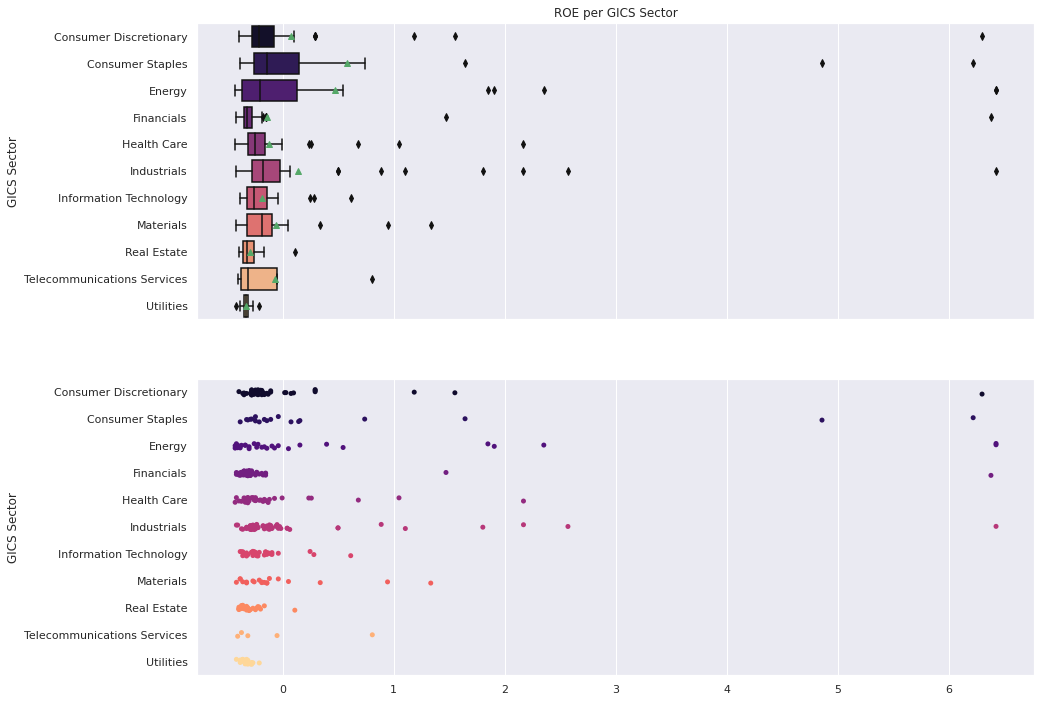

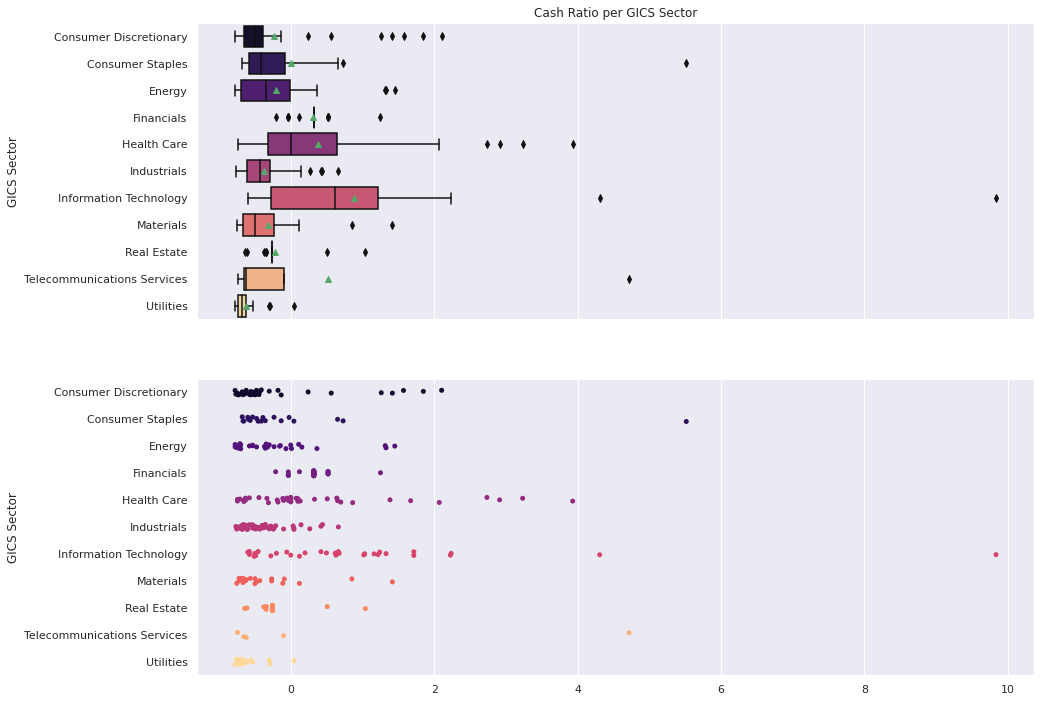

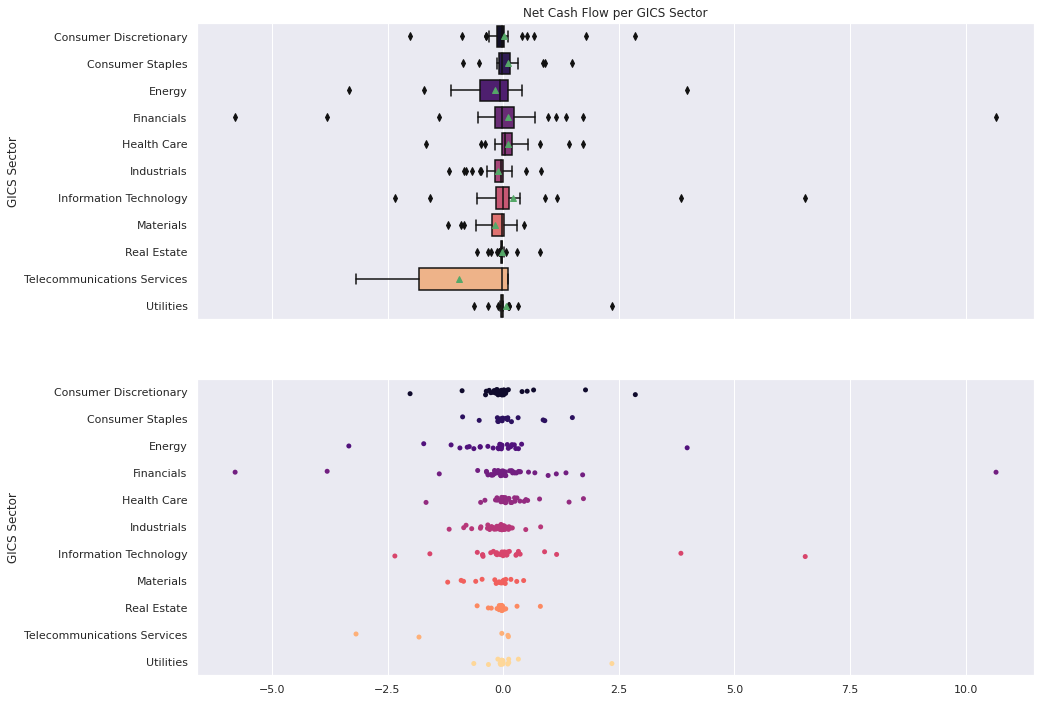

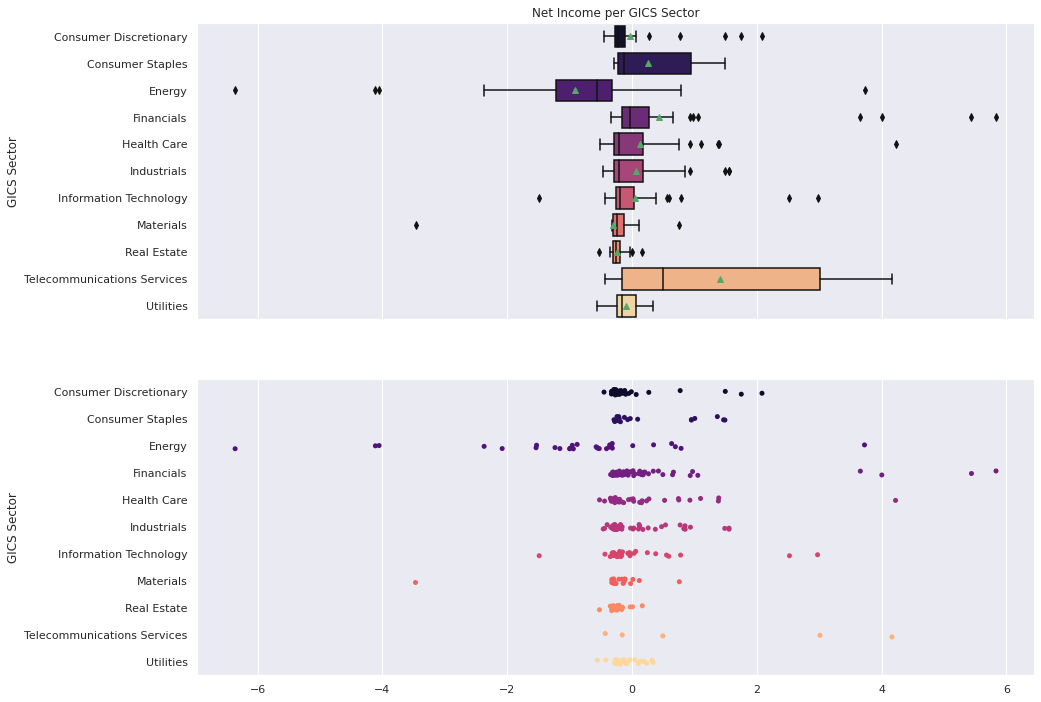

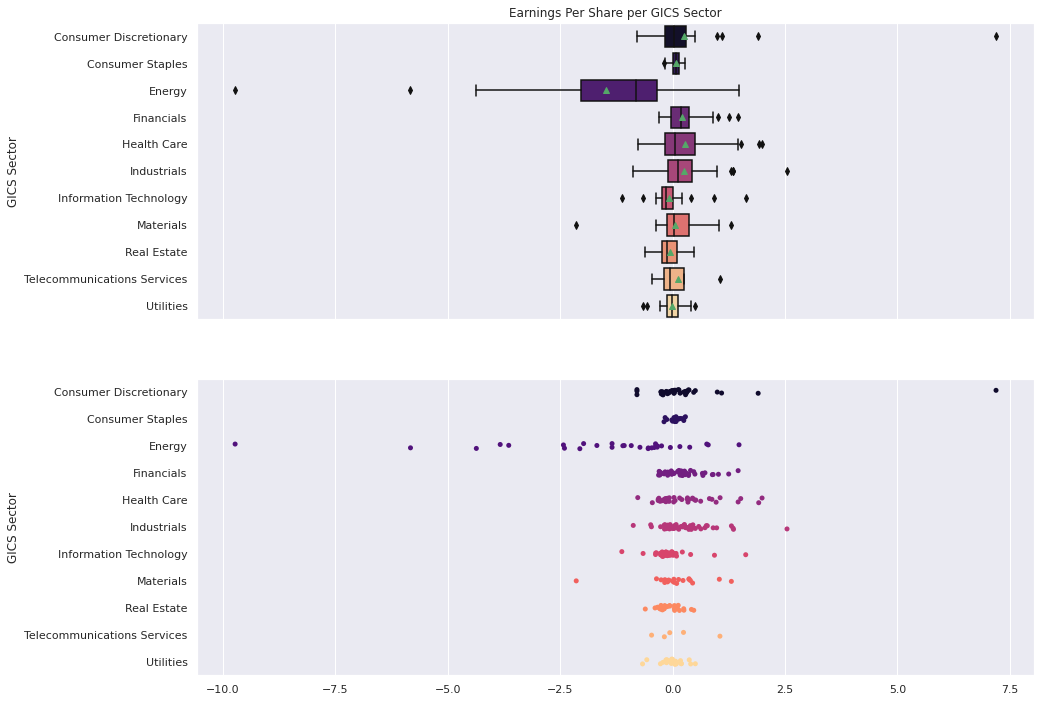

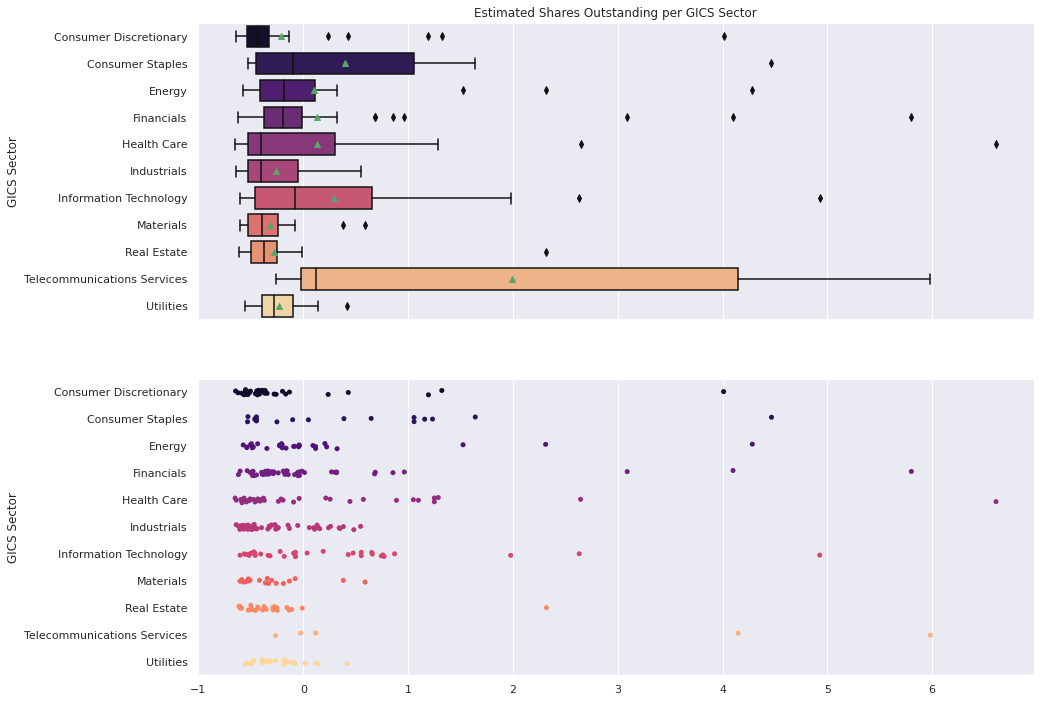

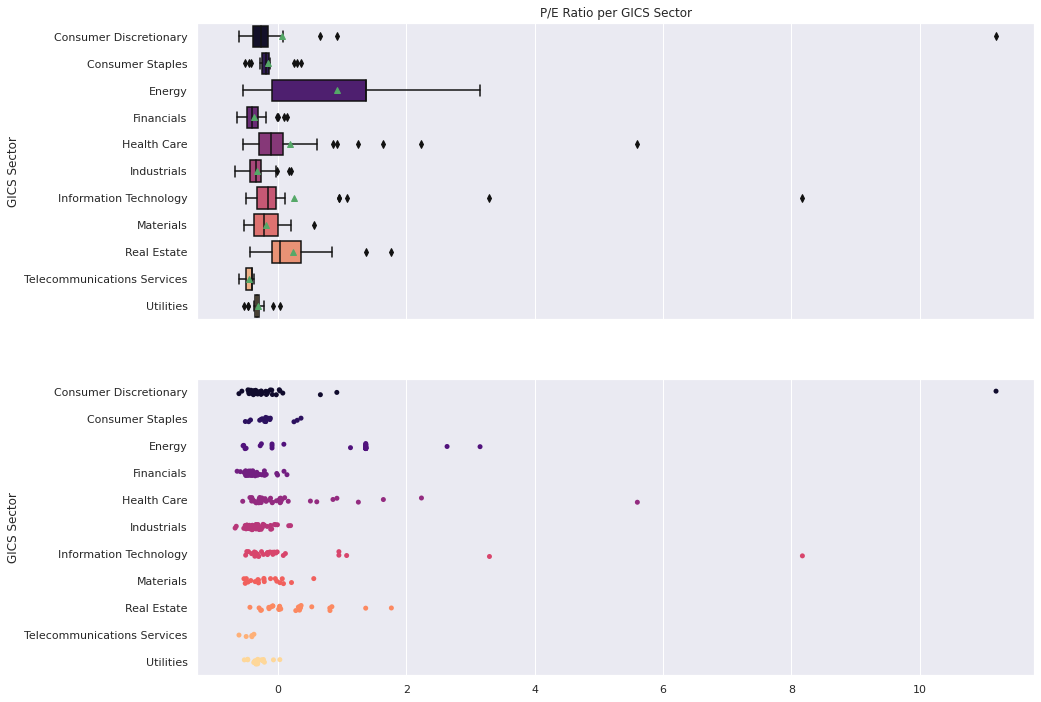

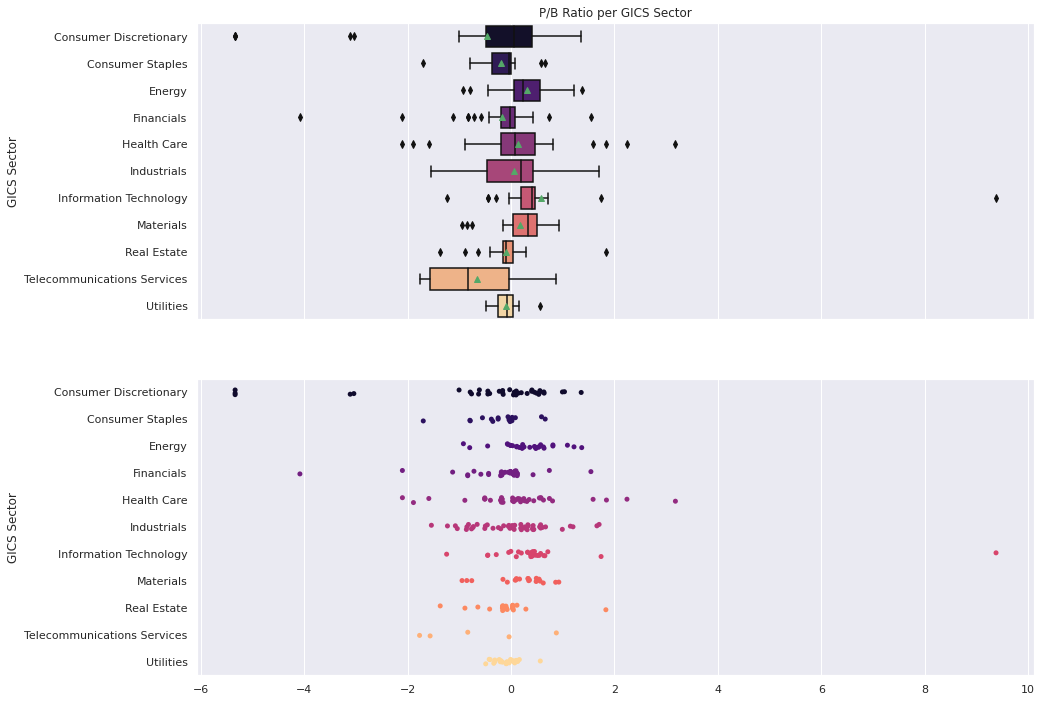

In [ ]:
tempData = stockData.copy()
tempData[numerical_variables] = subset_scaled_df

for i in range(0,len(numerical_variables)):
    detailedAnalysis(tempData,categorical_variables[1],numerical_variables[i],graph=True)

**Main thing here is that the values are now scaled and the diversity of the data was not lost in the process. The columns such as Net Income would have led to massive distortion of the results from clustering.**

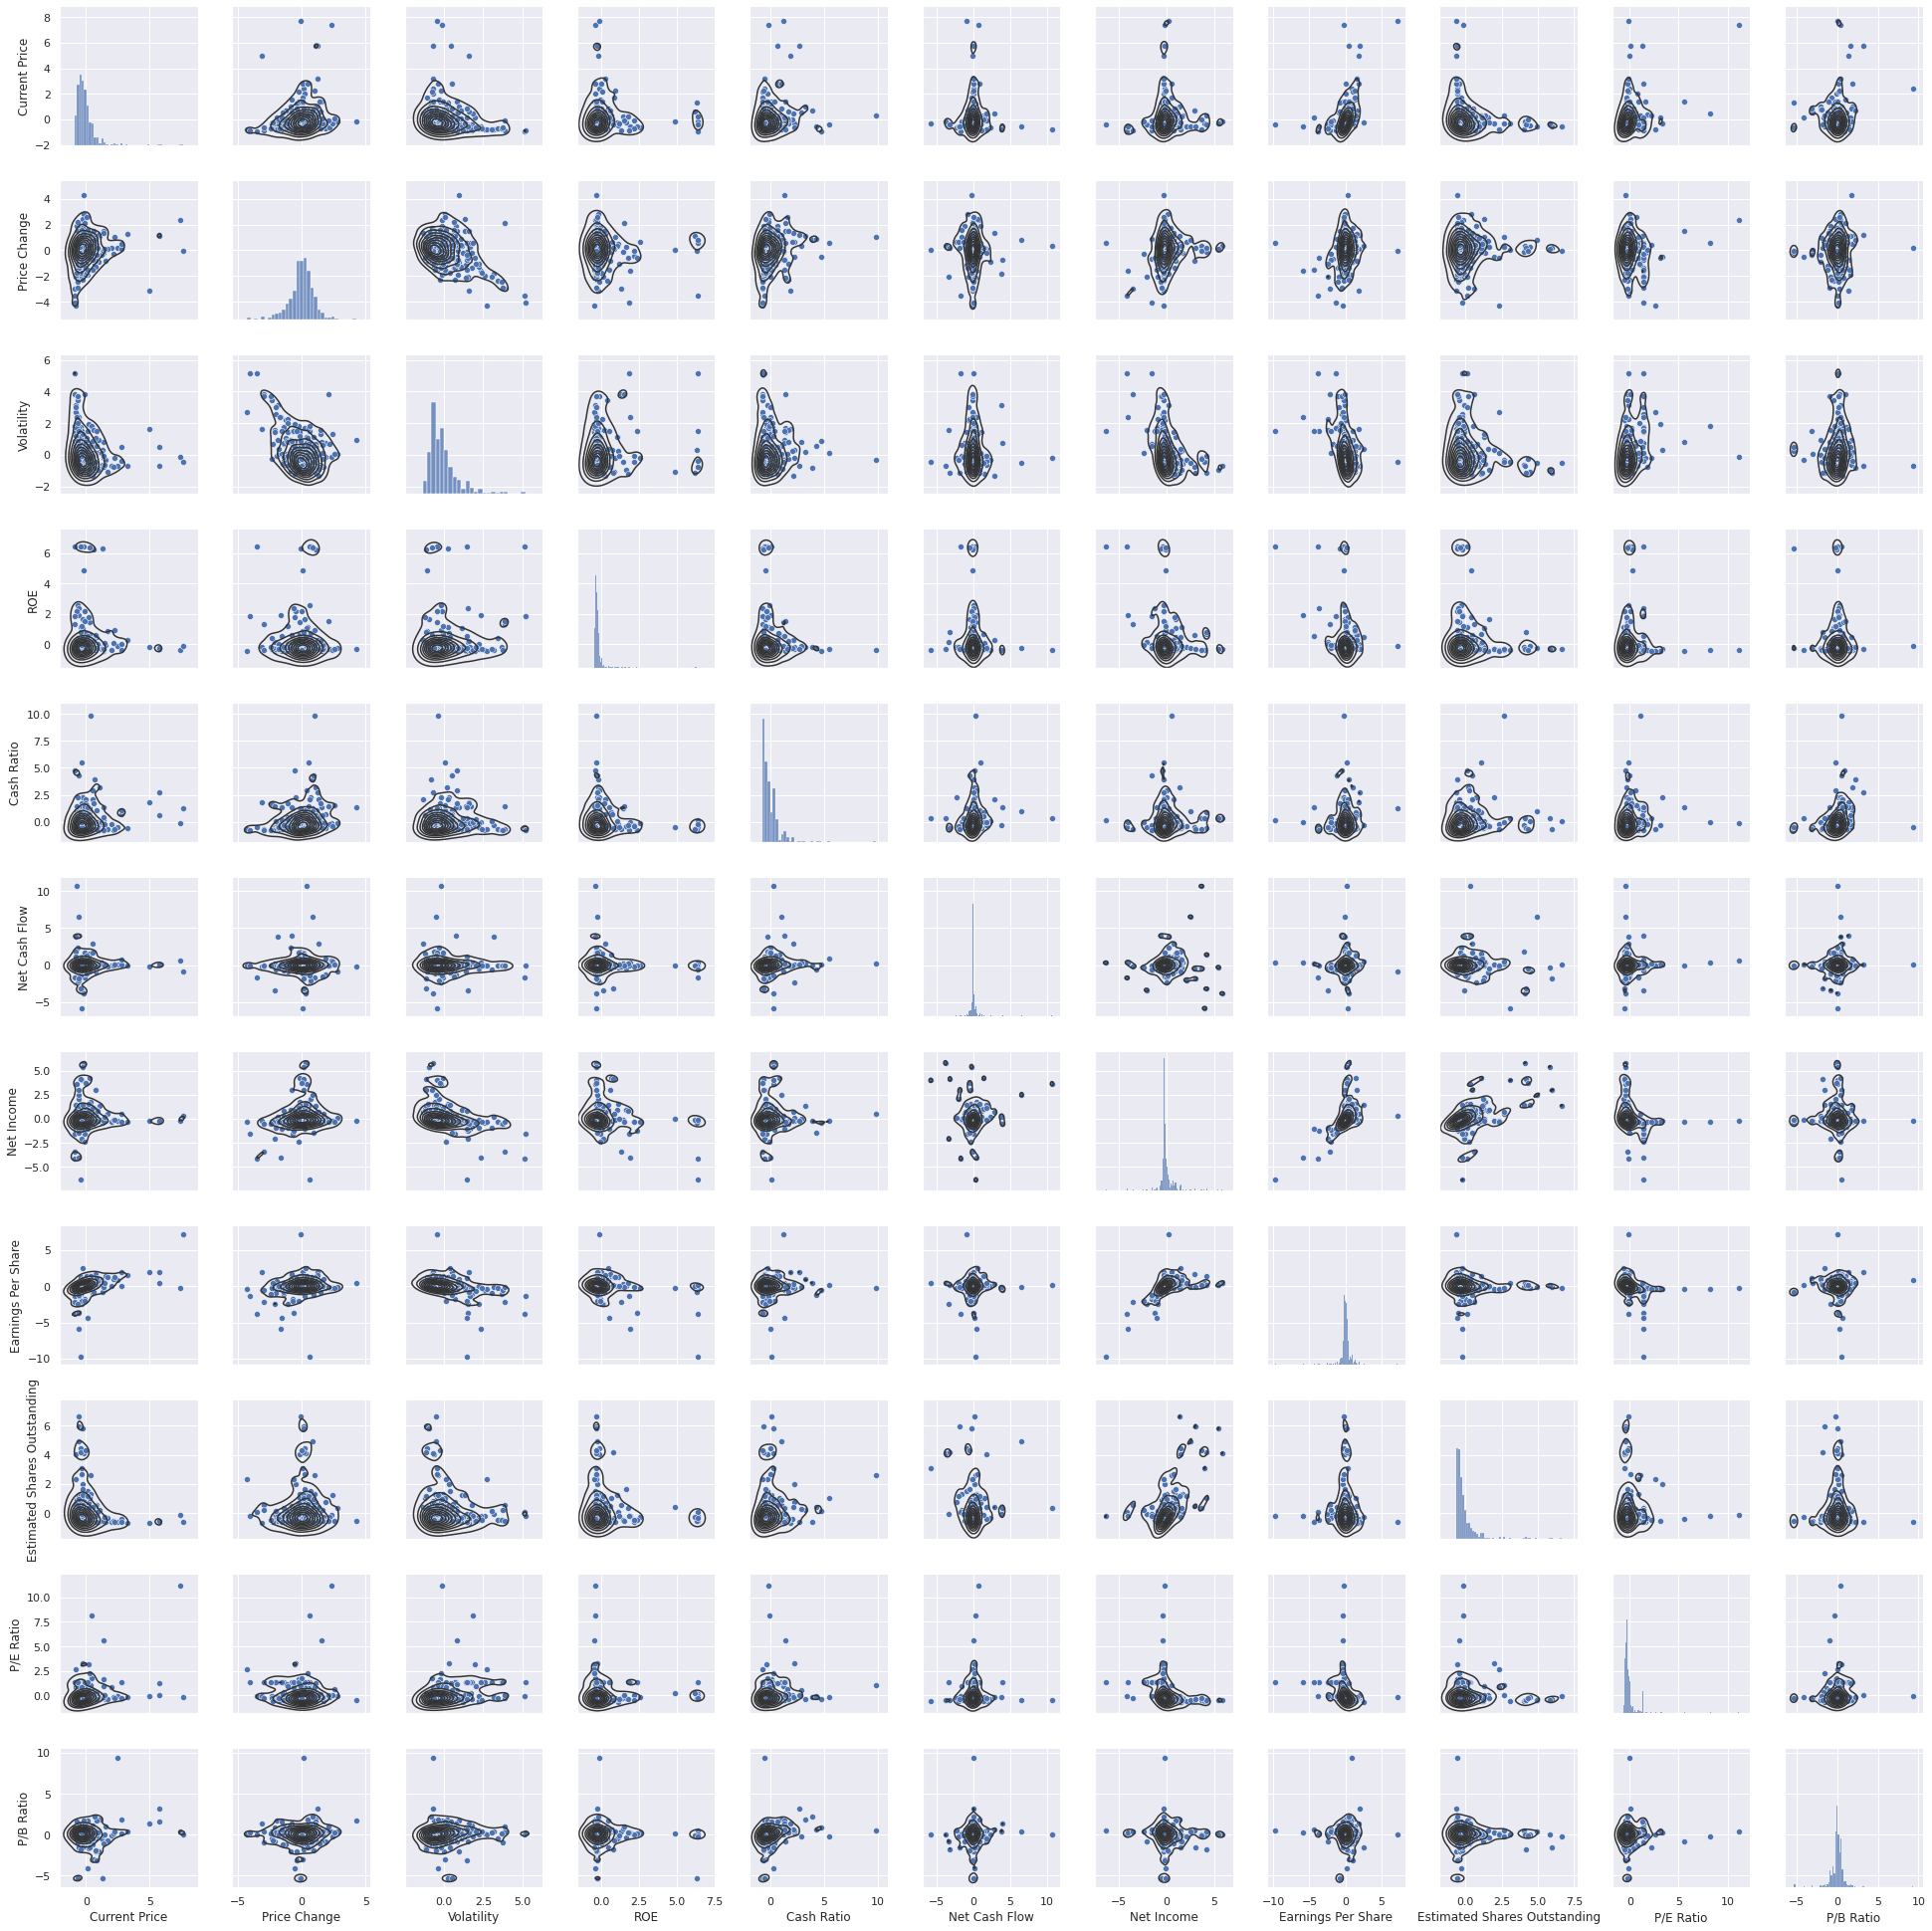

In [ ]:
g = sns.pairplot(subset_scaled_df,kind='scatter',diag_kind='hist',palette='pastel')
g.map_offdiag(sns.kdeplot, color=".2");

**Generally speaking I can see up to 5 clusters and atleast 3 in most cases. Which lines up with the clusters of three, maybe four in some cases that I saw in the univariate analysis above.**

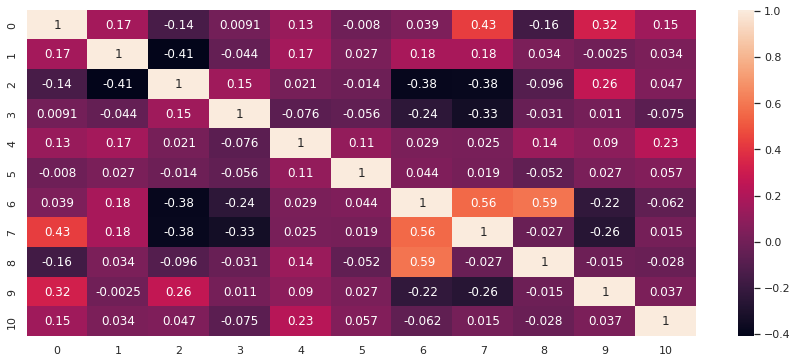

In [ ]:
covMatrix = pd.DataFrame(np.cov(subset_scaled_df,rowvar=False))
sns.heatmap(covMatrix,annot=True)

**I generated the Correlation matrix by using the scaled data to make a covariance matrix. This is a good double check to confirm that scaling worked correctly.**

In [ ]:
#One can display unique values if desired by running this line for debugging purposes.
for i in range(0,len(numerical_variables)):
  detailedAnalysis(tempData,categorical_variables[1],numerical_variables[i],display=True)

## K-means Clustering

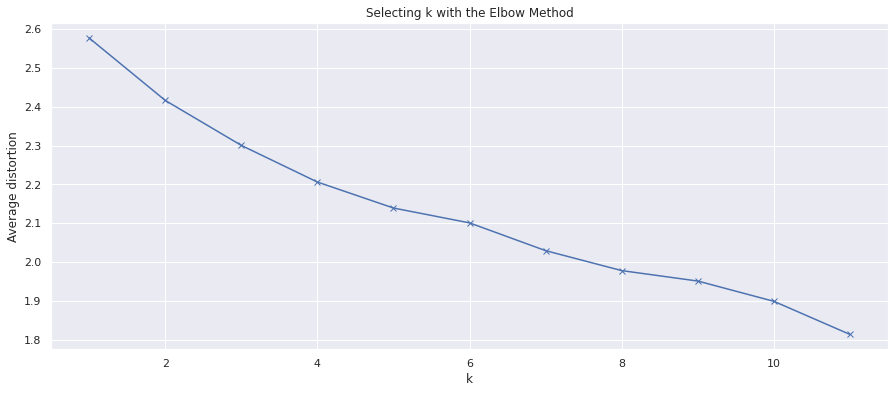

In [ ]:
# Finding optimal no. of clusters using the elbow method
clusters=range(1,12)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction=model.predict(subset_scaled_df)
    meanDistortions.append(sum(np.min(cdist(subset_scaled_df, model.cluster_centers_, 'euclidean'), axis=1)) / subset_scaled_df.shape[0])


plt.figure(figsize=(15,6))
plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method');

**Looks like four clusters was able to create alot of distortion when combined into three clusters, but it quickly falls off after that in most cases.**

For n_clusters = 2, silhouette score is 0.43251767527286816
For n_clusters = 3, silhouette score is 0.44824886717802137
For n_clusters = 4, silhouette score is 0.44167320393426096
For n_clusters = 5, silhouette score is 0.4024121171451355
For n_clusters = 6, silhouette score is 0.4143514134055707
For n_clusters = 7, silhouette score is 0.3932707553101769
For n_clusters = 8, silhouette score is 0.4021654908649751
For n_clusters = 9, silhouette score is 0.41546060563082643
For n_clusters = 10, silhouette score is 0.1638209839577587
For n_clusters = 11, silhouette score is 0.14574874997778137


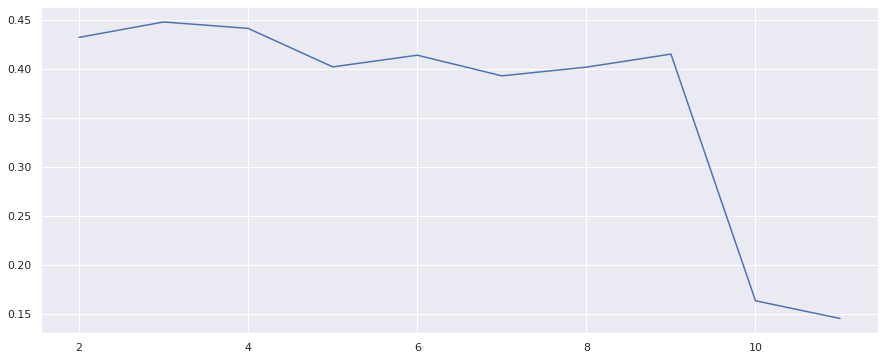

In [ ]:
# Investigating what silhouette scores are being generated
sil_score = []
cluster_list = list(range(2, 12))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

**Silhouette score for four clusters remains relatively consistent and appears to converge quite well. Seems like a choice of 3-5 is possible, but only 3 and 4 offer reliable convergence of the kmeans model.**

Groups Assigned : 



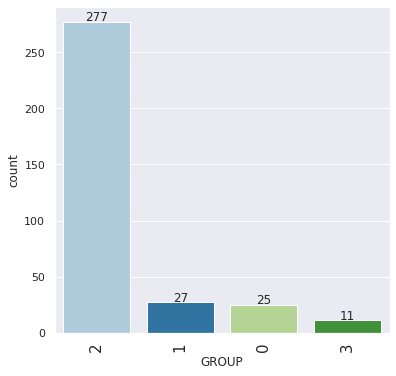

In [ ]:
# Let us first start with K = 4
final_model=KMeans(4)
final_model.fit(subset_scaled_df)

predictionKmeans = final_model.predict(subset_scaled_df) # save the predictions

#Append the prediction
stockData["GROUP"] = predictionKmeans
print("Groups Assigned : \n")
labeled_barplot(stockData,'GROUP')

**277 left in the main group if you happened to get the same starting point for kmeans, if not keep running till you see 277, 27, 25, and 11**

In [ ]:
# I am going to build a new variable that I will use to just spit out all the unique values in each group for GICS Sector
dataCluster = stockData.groupby(['GROUP'])
dataCluster[categorical_variables[1]].value_counts()

GROUP  GICS Sector                
0      Health Care                     9
       Consumer Discretionary          6
       Information Technology          6
       Consumer Staples                1
       Energy                          1
       Real Estate                     1
       Telecommunications Services     1
1      Energy                         22
       Information Technology          2
       Materials                       2
       Industrials                     1
2      Industrials                    52
       Financials                     46
       Consumer Discretionary         33
       Health Care                    29
       Real Estate                    26
       Information Technology         24
       Utilities                      24
       Materials                      18
       Consumer Staples               17
       Energy                          6
       Telecommunications Services     2
3      Financials                      3
       Health Care    

In [ ]:
# to just spit out all the unique values in each group for GICS Sub Industry
dataCluster[categorical_variables[0]].value_counts()

GROUP  Security                              
0      Alexion Pharmaceuticals                   1
       Alliance Data Systems                     1
       Amazon.com Inc                            1
       Amgen Inc                                 1
       Analog Devices, Inc.                      1
       BIOGEN IDEC Inc.                          1
       Celgene Corp.                             1
       Chipotle Mexican Grill                    1
       Edwards Lifesciences                      1
       Equinix                                   1
       Facebook                                  1
       First Solar Inc                           1
       Frontier Communications                   1
       Halliburton Co.                           1
       Intuitive Surgical Inc.                   1
       McDonald's Corp.                          1
       Monster Beverage                          1
       Netflix Inc.                              1
       Priceline.com Inc            

In [ ]:
# let's display cluster profiles based on maximum
stockData.groupby(['GROUP']).mean().style.highlight_max(color="mediumseagreen", axis=0)

In [ ]:
# let's display cluster profiles based on minimum
stockData.groupby(['GROUP']).mean().style.highlight_min(color="firebrick", axis=0)

**Cluster Profiling:**

Main Cluster (277) )  
- This is the main group that contains all the companies that are mostly middle of the road.

Safe Bets (25) )  
- Appears to be the companies predicted to have high value with higher than average P/B, Earnings Per Share, Cash Ratio, Price Change, and at the cost of a higher Current Price on average.
  - These are either top performers already or going to be based on current projections. Companies like Amazon, Facebook, Monster Energy, and Mcdonalds to name a few.

Massive and Old Companies (11) )
- These are companies with a very high Net Cash Flow, Estimated Shares Outstanding & Net Income.
  - If you look at the specific securities that it includes, it is mostly the biggest comapnies in America. The ones that everyone knows very well like Bank of America and Pfizer inc..

High Risk, High Reward (27) )
- High performing companies with high, on average, ROE, P/E, at the cost of high Volatility.
  - Mostly 22 companies from the "Energy" GICS Sector

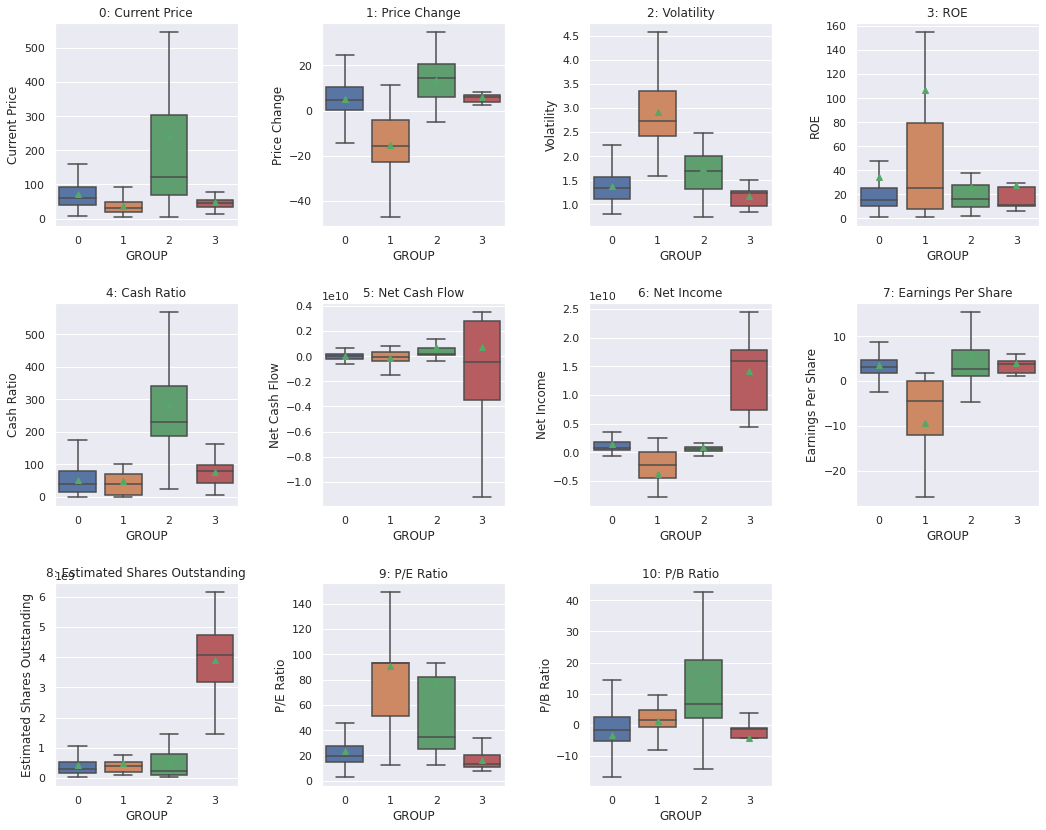

In [ ]:
# making boxplots to show the results graphically
plt.figure(figsize=(15, 12))

for i, variable in enumerate(numerical_variables):
    plt.subplot(3, 4, i + 1)
    plt.title('{}: {}'.format(i,numerical_variables[i]))
    sns.boxplot(data=stockData, x="GROUP", y=variable,showmeans=True,showfliers=False)

plt.tight_layout(pad=2.0)

## Hierarchical Clustering

**Lets start the HC by just printing out different cophenetic correlation values for different combinations of distance and linkage methods**

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# defining two variables that will be used to store highest amount
high_cophenet_corr = 0
high_dm_lm = [0, 0]

# Iterating through a nested for loop that will essentially evaluate all combinations of distance and linkage methods
for dm in distance_metrics:

  linkage_methods = ["single", "complete", "average", "weighted"]

  if dm == "euclidean":
    linkage_methods = ["single", "complete", "average", "weighted","ward","centroid"]

  for lm in linkage_methods:
      Z = linkage(subset_scaled_df, metric=dm, method=lm)
      c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
      print(
          "Cophenetic correlation for {} distance and {} linkage is {}.".format(
              dm.capitalize(), lm, c
          )
      )
      if high_cophenet_corr < c:
          high_cophenet_corr = c
          high_dm_lm[0] = dm
          high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9196481247418322.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8489073822253467.
Cophenetic correlation for Euclidean distance and average linkage is 0.9441080270963992.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8470545265208193.
Cophenetic correlation for Euclidean distance and ward linkage is 0.72980630048778.
Cophenetic correlation for Euclidean distance and centroid linkage is 0.9418032952411991.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9002888484374153.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8086733580887293.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9332162508462155.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9069191240606068.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9173640282599423.
Cophenetic correlation

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9441080270963992, which is obtained with Euclidean distance and average linkage.


**Okay euclidean with average linkage produced the highest cophenetic correlation. Unfortunately the dendogram produced is not great with this method. Lets print out the dendograms below and take a look.**

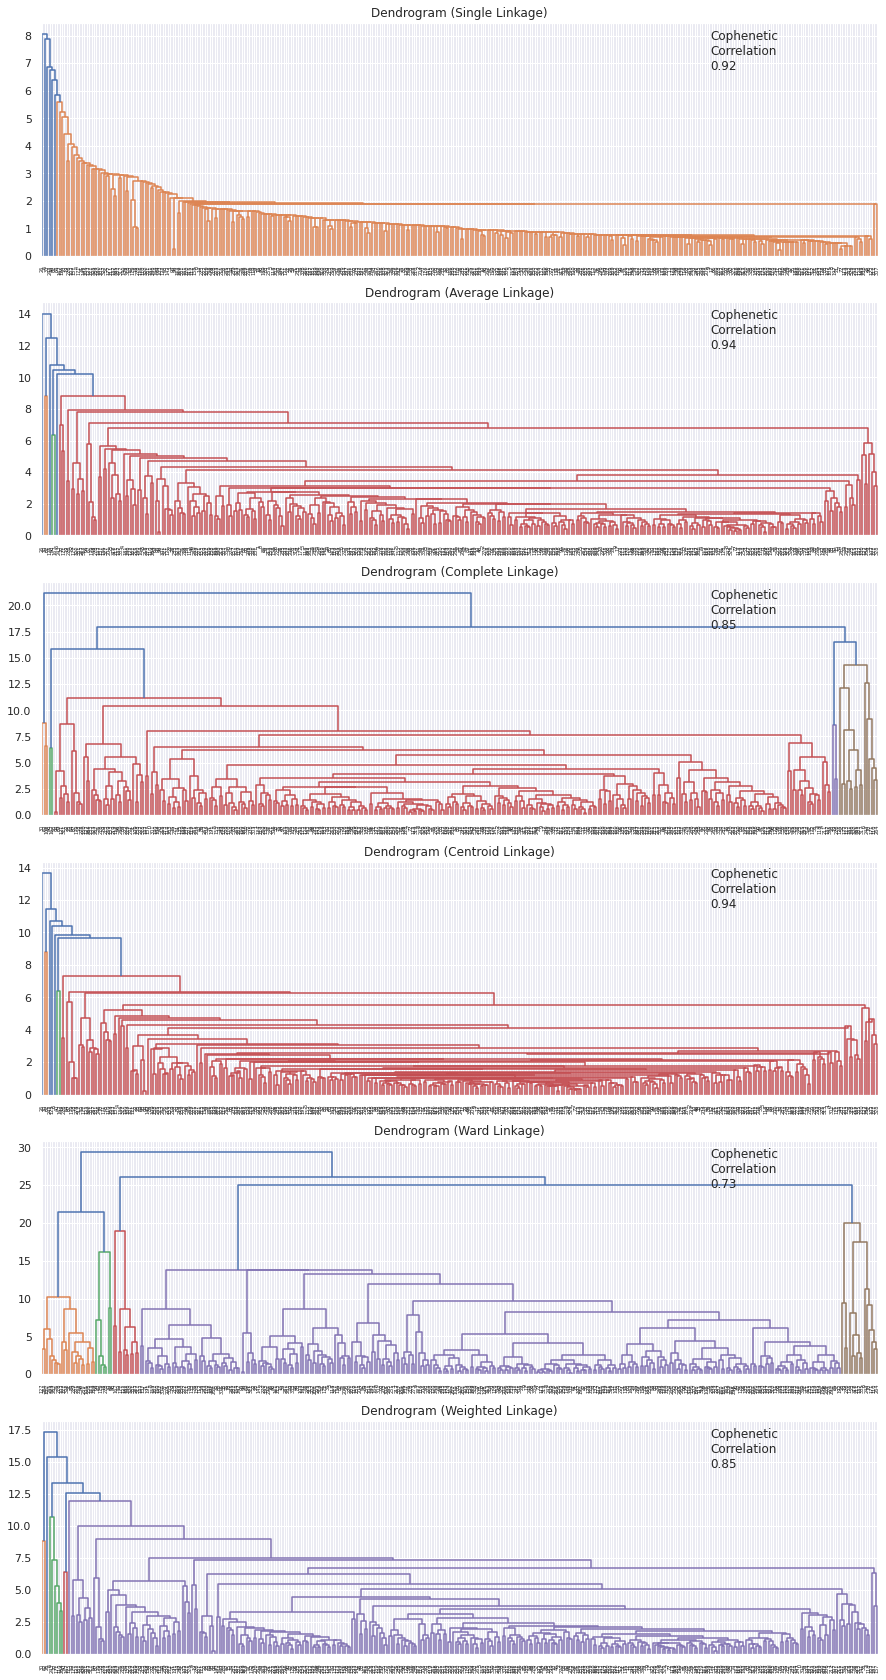

In [ ]:
# list of linkage methods
linkage_methods = ["single", "average", "complete", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

    compare.append([method, coph_corr])

**Observations:**
- All methods except "Ward" and "Complete" are useless.
  - I do not need an algorithm to figure out a handful of companies are different from the rest.
-  Ward seems to allow for an optimal clustering of four. Also it appears to produce a much more useful dendogram than the complete method, which favors 2 clusters.
- I used my mouse pointer and gauged the distance between each horizontal line. The biggest distance between horizontal lines is below the optimal cut off point. In this case choosing 2 or 4 would have been ideal based on looking at the distance between horizontal lines.

**Lets build the HC model with four clusters, ward linkage, and euclidean distance metric**

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=4)

Groups Assigned : 



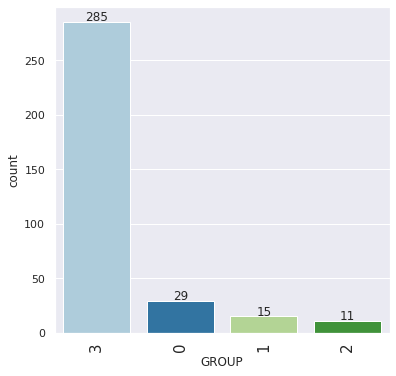

In [ ]:
predictionHClustering = HCmodel.labels_ # save the predictions as an array
stockData['GROUP'] = predictionHClustering # I reuse the stockData for simplicity by overwriting the old group values from kmeans, the predictions were saved seperately

print("Groups Assigned : \n")
labeled_barplot(stockData,'GROUP')

**Much faster and much more stable result for analysis**

In [ ]:
# same as the ones used above
dataCluster = stockData.groupby(['GROUP'])
dataCluster[categorical_variables[1]].value_counts()

GROUP  GICS Sector                
0      Energy                         22
       Consumer Staples                2
       Consumer Discretionary          1
       Financials                      1
       Industrials                     1
       Information Technology          1
       Materials                       1
1      Health Care                     5
       Information Technology          4
       Consumer Discretionary          3
       Consumer Staples                1
       Real Estate                     1
       Telecommunications Services     1
2      Financials                      4
       Telecommunications Services     2
       Consumer Discretionary          1
       Consumer Staples                1
       Energy                          1
       Health Care                     1
       Information Technology          1
3      Industrials                    52
       Financials                     44
       Consumer Discretionary         35
       Health Care    

In [ ]:
dataCluster[categorical_variables[0]].value_counts()

GROUP  Security                              
0      Allegion                                  1
       Anadarko Petroleum Corp                   1
       Apache Corporation                        1
       Baker Hughes Inc                          1
       Cabot Oil & Gas                           1
       Charter Communications                    1
       Chesapeake Energy                         1
       Cimarex Energy                            1
       Colgate-Palmolive                         1
       Concho Resources                          1
       Devon Energy Corp.                        1
       EOG Resources                             1
       Freeport-McMoran Cp & Gld                 1
       Hess Corporation                          1
       Kimberly-Clark                            1
       Kinder Morgan                             1
       Marathon Oil Corp.                        1
       Murphy Oil                                1
       National Oilwell Varco Inc.  

In [ ]:
# let's display cluster profiles
stockData.groupby(['GROUP']).mean().style.highlight_max(color="mediumseagreen", axis=0)

In [ ]:
# let's display cluster profiles based on minimum
stockData.groupby(['GROUP']).mean().style.highlight_min(color="firebrick", axis=0)

**Observations:**
- The profiling is exactly the same as mentioned previously in kmeans clustering. I will not repeat all the same observations here. Main difference is the amount in each group, which I will discuss in final section of notebook.
  - Esssentially there is a Main (285), Massive and Old (11), Safe Bets (15), and High Risk, High Reward (29) group just like before.
  - ROE in 'High Risk, High Reward' group is significantly higher than seen in kmeans model.
  - Current Price also appears to be significantly higher for the 'Safe Bets' group compared to kmeans model. Perhaps this is alluding to an enhanced precision within the HC model.

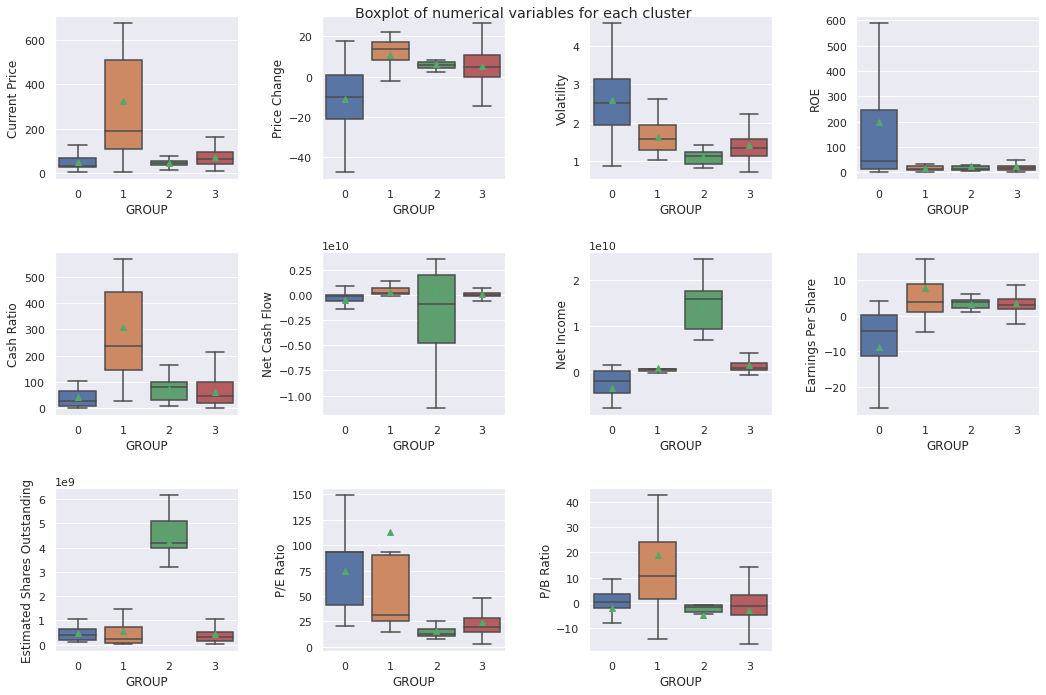

In [ ]:
# making boxplots to show the results graphically
plt.figure(figsize=(15, 10))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(numerical_variables):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=stockData, x="GROUP", y=variable,showmeans=True,showfliers=False)

plt.tight_layout(pad=2.0)

## K-means vs Hierarchical Clustering

**Lets start by taking a look at these clusters using TSNE**

In [ ]:
# to create the new reduced dimensions
from sklearn.manifold import TSNE

# building tsne with two components
tsne = TSNE(n_components=2, random_state=8)
X_reduced = tsne.fit_transform(subset_scaled_df)

#m making a data frame of the results for analysis
reduced_data_df = pd.DataFrame(data = X_reduced, columns = ['Component 1', 'Component 2'])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [ ]:
# making a dataframe of the predictions from each model for analysis
temp1 = pd.DataFrame(predictionKmeans, columns=['GROUP'])
temp2 = pd.DataFrame(predictionHClustering, columns=['GROUP'])

**KMEANS**

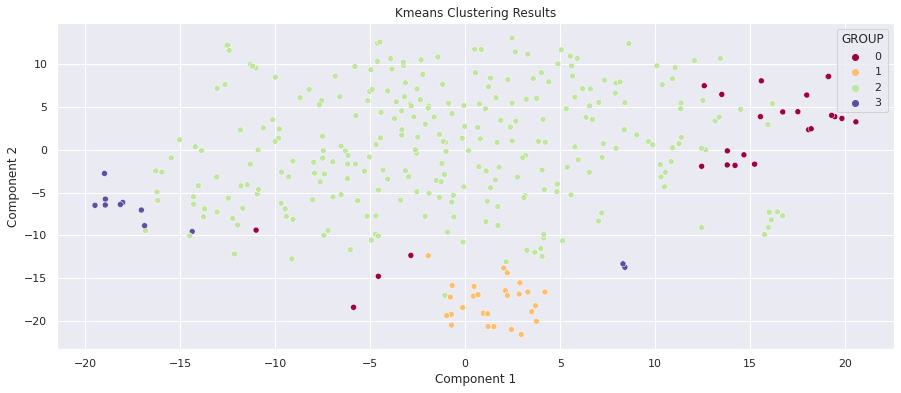

In [ ]:
sns.scatterplot(data=reduced_data_df,x='Component 1',y='Component 2',hue=temp1['GROUP'],palette='Spectral')
plt.title("Kmeans Clustering Results");

**HC**

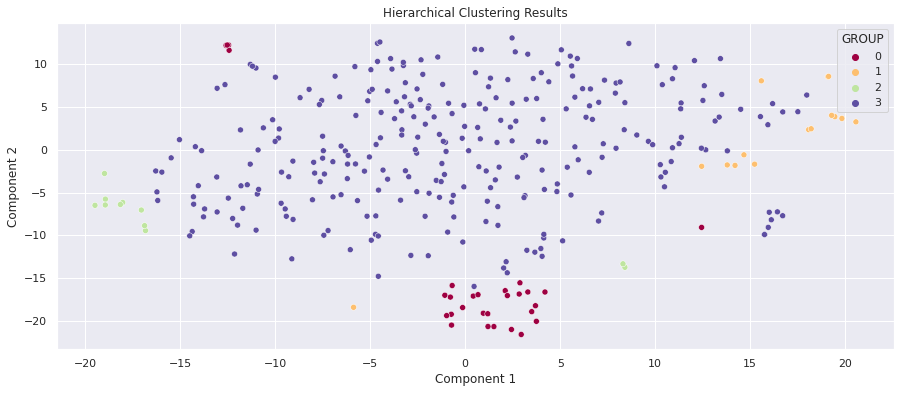

In [ ]:
sns.scatterplot(data=reduced_data_df,x='Component 1',y='Component 2',hue=temp2['GROUP'],palette='Spectral')
plt.title("Hierarchical Clustering Results");

**Observations:**
- One can clearly see how the kmeans algorithm had difficulty distinguishing between groups 2 and 0, which correspond to the 'Main group' and the 'Safe Bet' group.
 - Compared to only (15) in HC model, extra 10 companies within 'safe bet' group (25) in kmeans model. This is essentaially the main difference between these two models for this data.
  - In general, the kmeans++ algorithm appears to struggle with points on the edge of a large cluster near a much smaller cluster. The HC offers enhanced precision at the cost of reduced diversity wihtin each cluster.
- Also notice that the High Risk, High Reward group(bottom) is much more precisely grouped within the HC model.
- Kmeans model appeared to give me different results when ran multiple times because it converges based on different start points.  
  - I prefer the stability of HC for only 340 rows. However Kmeans was very easy to implement and allowed more flexibility in choosing different cluster sizes.
- Both methods seemed to independently suggest picking four clusters as the ideal amount. The consistency of this result adds to the credibility of my decision to choose to profile four clusters.

## Actionable Insights & Reccomendations


- I was able to determine four different clusters that are reasonable groupings of this stock data. In order to diversify ones portfolio, investments should be made in each of these groups.

  1) Main group
    - Contained all the middle of the road investments and does not offer alot of diversity, but should not be ignored. I would reccomend having atleast 1/4 of the total investments placed into this group.

  2) Safe Bets
    - I would invest in every single one of these companies if possible. They were on average pretty high performers in this dataset.

  3) Massive and Old
    - These are companies with huge net incomes and massive total shares. Maybe you would want to have some of them in your portfolio to help protect against losses in other riskier investments.

  4) High Risk, High Reward
    -  Speaking of risky investments, this group is mostly energy companies that make massive investments and do not always get a high return. I would definitely reccomend focusing more risky investment strategies on this group.

- In the full EDA below, I made a function that prints out the top 7 for each metric in this data. Interestingly, most of the companies in the top 7 did not appear in the main groups from either kmeans or HC model. This is expected based on how these agorithms work, but good to remember that essentially it is an objective way of grouping "distant" points.
  - Traditionally one would have to spend alot of time analyzing data to determine different categories and this process is not easily reproducible. This algorithm does intuitively the same thing, but with an objective measure of distance that is reproducible and modular.


Referring to the HC model,
Those are my reccomendations based on the above analysis:
- Invest atleast 25-50% of the investments in the 'safe bets' group.
- Invest atleast 10-25% in the 'massive and old' group.
- For a riskier investment strategy, consider 10% in 'massive and old' and 15% in 'high risk, high reward' group
  - Alternatively, all 25% in 'high risk, high reward' and 0% in 'massive and old'.
- Invest the remaining 25-50% in the 'main' group. Preferably less than the amount in 'safe bets' because they appear to indicate a better rate of success for investors at a higher cost.




## Appendix A: Full EDA

**This shows all the average values within each sector and a quick glance at values less than or equal to zero**

In [ ]:
for i in range(0,len(numerical_variables)):
  detailedAnalysis(stockData,categorical_variables[1],numerical_variables[i])


 ************************************************** >>>>Current Price<<<< ************************************************** 


Average values of Current Price within each GICS Sector:
GICS Sector
Consumer Discretionary        113.72
Consumer Staples               71.97
Energy                         46.04
Financials                     58.66
Health Care                   132.05
Industrials                    74.41
Information Technology         63.55
Materials                      76.55
Real Estate                    90.98
Telecommunications Services    32.96
Utilities                      52.97
Name: Current Price, dtype: float64

----------------------------------------------------------------------------------------------------

Filtering the rows which contained values less than or equal to 0 within the `Current Price` column:

"Nothing Found" in Current Price

----------------------------------------------------------------------------------------------------

...set "display=Tr

**Next I am printing out all of the unique values less than or equal to zero within each column to look for missing values or oddities**

In [ ]:
for i in range(0,len(numerical_variables)):
  detailedAnalysis(stockData,categorical_variables[1],numerical_variables[i],printResults=True)


 ************************************************** >>>>Current Price<<<< ************************************************** 

Filtering the rows which contained values less than or equal to 0 within the `Current Price` column:

"Nothing Found" in Current Price

 ************************************************** >>>>Price Change<<<< ************************************************** 

Filtering the rows which contained values less than or equal to 0 within the `Price Change` column:

Found a total of 95 rows, out of 340
Sorted by `Price Change` and "bottomFirst" is currently True: 

     Security                                GICS Sector                  GICS Sub Industry                                  Current Price    Price Change    Volatility    ROE    Cash Ratio    Net Cash Flow    Net Income    Earnings Per Share    Estimated Shares Outstanding    P/E Ratio    P/B Ratio    GROUP
---  --------------------------------------  ---------------------------  ------------------------

**Finally I am simply printing out all of the unique values within each sector, for each numerical column**

In [ ]:
for i in range(0,len(numerical_variables)):
  detailedAnalysis(stockData,categorical_variables[1],numerical_variables[i],display=True)


 ************************************************** >>>>Current Price<<<< ************************************************** 

Displaying all of the unique values withing each GICS Sector

1. Consumer Discretionary:
[ 14.09        17.82        23.280001    25.219999    25.52
  26.68        27.17        29.629999    32.669998    34.009998
  37.169998    43.23        44.080002    45.389999    48.91
  52.51617541  54.48        55.209999    59.66        67.040001
  67.360001    69.190002    72.650002    75.660004    80.610001
  85.25        85.5         85.730003    85.889999   101.209999
 105.080002   118.139999   124.300003   146.869995   183.100006
 189.389999   253.419998   479.850006   675.890015   700.        ]

2. Consumer Staples:
[ 36.68        39.540001    42.4399985   42.959999    44.84
  49.65333167  53.330002    58.209999    66.620003    78.949997
  79.410004    85.559998    87.910004    89.269997    93.199997
  93.919998    97.769997    99.919998   127.300003  ]

3. Energy:


**Here i print out the top 7 just to see what it shows. This is essentially the typical way of doing it right? Sort based on different filters in a table on some website.**

In [ ]:
def dataFilterTop7(data,variable_list,bottom_first=False):
  for i in range(0,len(variable_list)):
    if bottom_first == False:
      print('Filtering Top 7 based on {}:'.format(variable_list[i]))
    if bottom_first == True:
      print('Filtering Bottom 7 based on {}:'.format(variable_list[i]))
    temp = data[variable_list[i]]
    temp = temp.sort_values(ascending=bottom_first)
    print(tabulate(data.iloc[temp.index,:].head(7),headers=data.columns))

    if i != (len(variable_list)-1): #Simply to prevent running this print output command during last iteration
      print('...printing the next iteration','\n',
          '*'*335,sep='')

In [ ]:
variable_list_instance = numerical_variables[0:3]
dataFilterTop7(stockData,variable_list_instance)

Filtering Top 7 based on Current Price:
     Security                 GICS Sector             GICS Sub Industry                     Current Price    Price Change    Volatility    ROE    Cash Ratio    Net Cash Flow    Net Income    Earnings Per Share    Estimated Shares Outstanding    P/E Ratio    P/B Ratio    GROUP
---  -----------------------  ----------------------  ----------------------------------  ---------------  --------------  ------------  -----  ------------  ---------------  ------------  --------------------  ------------------------------  -----------  -----------  -------
243  Priceline.com Inc        Consumer Discretionary  Internet & Direct Marketing Retail           700            3.19053       1.26834     29           184      -1671386000    2551360000                 50.09                     5.09355e+07      25.4532    -1.05243         1
 26  Amazon.com Inc           Consumer Discretionary  Internet & Direct Marketing Retail           675.89        32.2681        1

In [ ]:
variable_list_instance = numerical_variables[3:6]
dataFilterTop7(stockData,variable_list_instance)

Filtering Top 7 based on ROE:
     Security                GICS Sector             GICS Sub Industry                     Current Price    Price Change    Volatility    ROE    Cash Ratio    Net Cash Flow    Net Income    Earnings Per Share    Estimated Shares Outstanding    P/E Ratio    P/B Ratio    GROUP
---  ----------------------  ----------------------  ----------------------------------  ---------------  --------------  ------------  -----  ------------  ---------------  ------------  --------------------  ------------------------------  -----------  -----------  -------
 62  Chesapeake Energy       Energy                  Integrated Oil & Gas                           4.5        -38.1018       4.55981     600            22      -3283000000  -14685000000                -22.43                     6.54704e+08      28.4079    -1.84053         0
 18  Allegion                Industrials             Building Products                             65.92        13.7532       1.28379     600 

In [ ]:
variable_list_instance = numerical_variables[6:9]
dataFilterTop7(stockData,variable_list_instance)

Filtering Top 7 based on Net Income:
     Security                GICS Sector                  GICS Sub Industry                         Current Price    Price Change    Volatility    ROE    Cash Ratio    Net Cash Flow    Net Income    Earnings Per Share    Estimated Shares Outstanding    P/E Ratio    P/B Ratio    GROUP
---  ----------------------  ---------------------------  --------------------------------------  ---------------  --------------  ------------  -----  ------------  ---------------  ------------  --------------------  ------------------------------  -----------  -----------  -------
177  JPMorgan Chase & Co.    Financials                   Banks                                             66.03         8.03338      1.13034      10            99      -7341000000   24442000000                  6.05                     4.04e+09        10.914      -1.88688         2
320  Wells Fargo             Financials                   Banks                                             

In [ ]:
variable_list_instance = numerical_variables[9:11]
dataFilterTop7(stockData,variable_list_instance)

Filtering Top 7 based on P/E Ratio:
     Security                 GICS Sector             GICS Sub Industry                                  Current Price    Price Change    Volatility    ROE    Cash Ratio    Net Cash Flow    Net Income    Earnings Per Share    Estimated Shares Outstanding    P/E Ratio    P/B Ratio    GROUP
---  -----------------------  ----------------------  -----------------------------------------------  ---------------  --------------  ------------  -----  ------------  ---------------  ------------  --------------------  ------------------------------  -----------  -----------  -------
 26  Amazon.com Inc           Consumer Discretionary  Internet & Direct Marketing Retail                        675.89        32.2681        1.46039      4            58       1333000000     596000000                  1.28                     4.65625e+08      528.039      3.90443        1
226  Netflix Inc.             Information Technology  Internet Software & Services            

In [ ]:
%%shell
jupyter nbconvert --to html /content/USL_Project_LearnerNotebook_FullCode_AaronRuhl.ipynb

[NbConvertApp] Converting notebook /content/USL_Project_LearnerNotebook_FullCode_AaronRuhl.ipynb to html
[NbConvertApp] Writing 6461353 bytes to /content/USL_Project_LearnerNotebook_FullCode_AaronRuhl.html
